**INSTALLATION**

In [1]:
!git clone --recurse-submodules https://github.com/safednn-nasa/ProphecyPlus

fatal: destination path 'ProphecyPlus' already exists and is not an empty directory.


In [2]:
%cd ./ProphecyPlus
!pwd
!ls -lt

/content/ProphecyPlus
/content/ProphecyPlus
total 44
drwxr-xr-x 2 root root 4096 Jan  1 05:14 test_coverage
drwxr-xr-x 2 root root 4096 Jan  1 05:14 runtime_detection_posion
drwxr-xr-x 2 root root 4096 Jan  1 05:14 runtime_detection
drwxr-xr-x 5 root root 4096 Jan  1 05:14 prophecy
-rw-r--r-- 1 root root  124 Jan  1 05:14 requirements.txt
drwxr-xr-x 2 root root 4096 Jan  1 05:14 results
drwxr-xr-x 2 root root 4096 Jan  1 05:14 formal_guarantees
drwxr-xr-x 2 root root 4096 Jan  1 05:14 examples
drwxr-xr-x 7 root root 4096 Jan  1 05:14 dataset_models
drwxr-xr-x 2 root root 4096 Jan  1 05:14 concept_based_analysis
-rw-r--r-- 1 root root 3086 Jan  1 05:14 README.md


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 31.6 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing

**LOAD GTSRB MODEL AND DATA**

In [3]:
import requests

# Dropbox shared link (ensure it's the correct URL)
shared_link = "https://www.dropbox.com/scl/fi/ao7lgo8okrvqcsn82mwfp/gtsrb_test_X.txt?rlkey=t4ubke9zj577176ppa2qc1ceb&st=2dsho24l&dl=0"

# Modify the link for direct download
direct_download_url = shared_link.replace("dl=0", "dl=1")

# Filepath to save the downloaded file
file_path = "gtsrb_test_X.txt"

try:
    # Send a GET request to download the file
    response = requests.get(direct_download_url)
    response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

    # Save the content to a local file
    with open(file_path, "wb") as file:
        file.write(response.content)
    print(f"File downloaded successfully and saved as {file_path}")

except requests.exceptions.RequestException as e:
    print(f"Error occurred: {e}")


# Dropbox shared link (ensure it's the correct URL)
shared_link1 = "https://www.dropbox.com/scl/fi/n2vh5enptqu2ywgyqt15n/gtsrb_test_Y.txt?rlkey=0a6y6mhzzlpkaltnh7383u7xv&st=zaj5z5mq&dl=0"

# Modify the link for direct download
direct_download_url1 = shared_link1.replace("dl=0", "dl=1")

# Filepath to save the downloaded file
file_path1 = "gtsrb_test_Y.txt"

try:
    # Send a GET request to download the file
    response1 = requests.get(direct_download_url1)
    response1.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

    # Save the content to a local file
    with open(file_path1, "wb") as file:
        file.write(response1.content)
    print(f"File downloaded successfully and saved as {file_path1}")

except requests.exceptions.RequestException as e:
    print(f"Error occurred: {e}")

########################
import os,sys
from scipy import stats
import numpy as np

x = []
y = []

f=open('gtsrb_test_X.txt', 'r').readlines()
for i in range(0,len(f)):
    w=f[i].split(",")
    line_row = []
    for indx in range(0, len(w)):
      val = int(w[indx])
      line_row.append(val)
    x.append(line_row)

f=open('gtsrb_test_Y.txt', 'r').readlines()
for i in range(0,len(f)):
    w=f[i].split(",")
    line_row = []
    for indx in range(0, len(w)):
      val = int(w[indx])
      line_row.append(val)
    y.append(line_row)


print(np.shape(x))
print(np.shape(y))

train_len = 0.8 * len(x)
train_len = int(train_len)
x_train = x[0:train_len]
y_train = y[0:train_len]
x_test = x[train_len:]
y_test = y[train_len:]
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

#############################
import numpy as np

import tensorflow as tf

import time


import keras

x_test = np.array(x_test)
# Create a new array to store reshaped images
x_test_reshaped = np.zeros((x_test.shape[0], 32, 32, 3), dtype=x_test.dtype)

for indx in range(0,len(x_test)):
  x_test_reshaped[indx] = np.reshape(x_test[indx], (32,32,3))  # Store reshaped image in new array

y_test = np.array(y_test)

print(np.shape(x_test_reshaped)) # Print shape of the reshaped array
print(np.shape(y_test))



np.save('./x_test_npy.npy', x_test_reshaped)
np.save('./y_test_npy.npy', y_test)

x_train = np.array(x_train)
# Create a new array to store reshaped images
x_train_reshaped = np.zeros((x_train.shape[0], 32, 32, 3), dtype=x_test.dtype)

for indx in range(0,len(x_train)):
  x_train_reshaped[indx] = np.reshape(x_train[indx], (32,32,3))  # Store reshaped image in new array

y_train = np.array(y_train)

print(np.shape(x_train_reshaped)) # Print shape of the reshaped array
print(np.shape(y_train))



np.save('./x_train_npy.npy', x_train_reshaped)
np.save('./y_train_npy.npy', y_train)


!wget https://raw.githubusercontent.com/safednn-nasa/ProphecyPlus/master/dataset_models/gtsrb/gtsrb.h5 -O ./gtsrb.h5

print('Loading the model:')
model=tf.keras.models.load_model('gtsrb.h5')
print("Printing summary of the model:")
model.summary()

File downloaded successfully and saved as gtsrb_test_X.txt
File downloaded successfully and saved as gtsrb_test_Y.txt
(12630, 3072)
(12630, 1)
(10104, 3072)
(10104, 1)
(2526, 3072)
(2526, 1)
(2526, 32, 32, 3)
(2526, 1)
(10104, 32, 32, 3)
(10104, 1)
--2025-01-01 05:17:12--  https://raw.githubusercontent.com/safednn-nasa/ProphecyPlus/master/dataset_models/gtsrb/gtsrb.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16358752 (16M) [application/octet-stream]
Saving to: ‘./gtsrb.h5’

./gtsrb.h5          100%[===================>]  15.60M  --.-KB/s    in 0.1s    

2025-01-01 05:17:13 (138 MB/s) - ‘./gtsrb.h5’ saved [16358752/16358752]

Loading the model:
Printing summary of the model:
Model: "sequential_1"
________________________________________________________

**INVOKE PROPHECY TO EXTRACT RULES**

In [4]:
!python -m prophecy.main -m './gtsrb.h5' analyze -h

usage: main.py analyze [-h] -tx TRAIN_FEATURES -ty TRAIN_LABELS -vx VAL_FEATURES -vy VAL_LABELS
                       [-odl] [-oal] [-sr] [-b] [-c] [-rs RANDOM_STATE] [-type TYPE]
                       [-inptype INPTYPE] [-acts ACTS] [-layer_name LAYER_NAME] [-top TOP]

options:
  -h, --help            show this help message and exit
  -tx TRAIN_FEATURES, --train_features TRAIN_FEATURES
                        Train features
  -ty TRAIN_LABELS, --train_labels TRAIN_LABELS
                        Train labels
  -vx VAL_FEATURES, --val_features VAL_FEATURES
                        Validation features
  -vy VAL_LABELS, --val_labels VAL_LABELS
                        Validation labels
  -odl, --only-dense-layers
                        Consider only dense layers
  -oal, --only-activation-layers
                        Include the activation layers associated to the dense layers
  -sr, --skip-rules     Skip rules extraction
  -b, --balance         Balance classes in the dataset for traini

**PARAMETERS: rules for correct vs incorrect behavior, rules in terms of neuron values, all rules, all dense and activation layers.**

In [ ]:
if os.path.exists('/results/gtsrb/rules/'):
  shutil.rmtree('/results/gtsrb/rules/')

os.makedirs('/results/gtsrb/rules/')

!pwd

!python -m prophecy.main -m ./'gtsrb.h5' -wd '/content/ProphecyPlus/results/gtsrb/rules/' analyze -tx ./x_train_npy.npy -ty ./y_train_npy.npy -vx ./x_test_npy.npy -vy ./y_test_npy.npy -odl  -type 1

CONFIG PARAMS: LAYER NAME: None ,TYPE: 1 ,INP TYPE: 0 ,ACTS: False ,Top/All: False
Only dense layers are considered for fingerprinting
Layers to be considered for fingerprinting: ['dense_1', 'dense_2']
79/79 [==============================] - 2s 18ms/step
Evaluating train set: 100% 10104/10104 [00:00<00:00, 346583.97it/s]
TRAIN: Label 0: 61, Label 1: 723, Label 2: 748, Label 3: 454, Label 4: 645, Label 5: 658, Label 6: 124, Label 7: 439, Label 8: 424, Label 9: 469, Label 10: 666, Label 11: 422, Label 12: 667, Label 13: 722, Label 14: 274, Label 15: 219, Label 16: 152, Label 17: 360, Label 18: 378, Label 19: 59, Label 20: 97, Label 21: 85, Label 22: 111, Label 23: 147, Label 24: 85, Label 25: 502, Label 26: 148, Label 27: 58, Label 28: 128, Label 29: 4, Label 30: 13, Label 31: 6, Label 32: 10, Label 33: 8, Label 34: 2, Label 35: 1, Label 37: 1, Label 38: 10, Label 40: 9, Label 41: 4, Label 42: 11, 
TRAIN LABELS: (10104,)
TRAIN ACCURACY: 96.298495645289
TRAIN LABELS COUNT: {0: 9730, 1000

In [ ]:
import pandas as pd
_output_path = "/content/ProphecyPlus/gtsrb/rules/ruleset.csv"


print("****** RULES ********")
df_op = pd.read_csv(_output_path)
df_op

print("****** dense_1 RULES ********")
filter_df = df_op[df_op['layer'] == 'dense_1']
filter_df

****** RULES ********
****** dense_1 RULES ********


,layer,layer_count,neurons,signature,support,label,train_coverage,train_precision,train_recall,train_f1,test_coverage,test_precision,test_recall,test_f1,f1,kind
0,dense_1,1,"[386, 24, 377, 39, 246, 389, 495, 295, 187, 26...","['<=', 0.6426789462566376, '<=', 7.42483472824...",3222,0,31.888361,100,33.114080,49.752934,3.285827,81.927711,2.796053,5.407555,27.580244,correct
1,dense_1,1,"[386, 24, 377, 39, 246, 149, 334, 261, 91, 416...","['<=', 0.6426789462566376, '<=', 7.42483472824...",2565,0,25.385986,100,26.361768,41.724278,19.200317,98.144330,19.572368,32.636270,37.180274,correct
2,dense_1,1,"[386, 24, 377, 39, 246, 149, 334, 261, 421, 36...","['<=', 0.6426789462566376, '<=', 7.42483472824...",688,0,6.809184,100,7.070915,13.207909,9.144893,96.969697,9.210526,16.823132,15.015521,correct
3,dense_1,1,"[386, 24, 377, 39, 246, 389, 495, 295, 187, 26...","['<=', 0.6426789462566376, '<=', 7.42483472824...",550,0,5.443389,100,5.652621,10.700389,0.079177,100.000000,0.082237,0.164339,5.432364,correct
4,dense_1,1,"[386, 24, 377, 39, 246, 149, 271, 509, 362, 68...","['<=', 0.6426789462566376, '<=', 7.42483472824...",537,0,5.314727,100,5.519013,10.460699,13.816310,96.561605,13.856908,24.235886,17.348293,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,dense_1,1,"[386, 417, 281, 161, 18, 125, 362, 333]","['>', 0.6426789462566376, '<=', 2.466285347938...",1,1000,0.009897,100,0.267380,0.533333,0.000000,0.000000,0.000000,0.000000,0.266667,incorrect
273,dense_1,1,"[386, 417, 281, 161, 18, 125, 362]","['>', 0.6426789462566376, '<=', 2.466285347938...",1,1000,0.009897,100,0.267380,0.533333,0.000000,0.000000,0.000000,0.000000,0.266667,incorrect
274,dense_1,1,"[386, 417, 281, 161, 54, 266, 348, 454]","['>', 0.6426789462566376, '<=', 2.466285347938...",1,1000,0.009897,100,0.267380,0.533333,0.950119,0.000000,0.000000,0.000000,0.266667,incorrect
275,dense_1,1,"[386, 417, 398, 25, 281, 193]","['>', 0.6426789462566376, '>', 2.4662853479385...",1,1000,0.009897,100,0.267380,0.533333,0.039588,0.000000,0.000000,0.000000,0.266667,incorrect


**PARAMETERS: rules for correct classification to each label vs incorrect behavior, rules in terms of neuron values, TOP rules, all dense and activation layers.**

In [5]:
import os
import shutil
if os.path.exists('/results/gtsrb/rules/'):
  shutil.rmtree('/results/gtsrb/rules/')

os.makedirs('/results/gtsrb/rules/')

!pwd

!python -m prophecy.main -m ./'gtsrb.h5' -wd '/content/ProphecyPlus/gtsrb/rules/' analyze -tx ./x_test_npy.npy -ty ./y_test_npy.npy -vx ./x_test_npy.npy -vy ./y_test_npy.npy -odl -oal -type 2 -top True

/content/ProphecyPlus
CONFIG PARAMS: LAYER NAME: None ,TYPE: 2 ,INP TYPE: 0 ,ACTS: False ,Top/All: True
Dense layers and associated activation layers are considered for fingerprinting
Layers to be considered for fingerprinting: ['dense_1', 'dense_2']
20/20 [==============================] - 1s 20ms/step
Evaluating train set: 100% 2526/2526 [00:00<00:00, 337694.01it/s]
TRAIN: Label 1: 4, Label 2: 1, Label 3: 3, Label 6: 8, Label 7: 2, Label 9: 1, Label 10: 1, Label 11: 1, Label 12: 2, Label 13: 6, Label 15: 1, Label 16: 1, Label 18: 1, Label 20: 5, Label 22: 4, Label 23: 4, Label 24: 2, Label 26: 3, Label 28: 52, Label 29: 84, Label 30: 137, Label 31: 267, Label 32: 60, Label 33: 205, Label 34: 122, Label 35: 394, Label 36: 117, Label 37: 57, Label 38: 680, Label 39: 85, Label 40: 83, Label 41: 67, Label 42: 66, 
TRAIN LABELS: (2526,)
TRAIN ACCURACY: 96.27870150435471
TRAIN LABELS COUNT: {28: 36, 29: 79, 30: 135, 31: 267, 32: 60, 33: 205, 34: 119, 35: 389, 36: 117, 37: 57, 38: 677, 39: 

In [ ]:
import pandas as pd
_output_path = "/content/ProphecyPlus/gtsrb/rules/ruleset.csv"


print("****** RULES ********")
df_op = pd.read_csv(_output_path)
df_op

print("****** dense_1 RULES ********")
filter_df = df_op[df_op['layer'] == 'dense_1']
filter_df

****** RULES ********
****** dense_1 RULES ********


,layer,layer_count,neurons,signature,support,label,train_coverage,train_precision,train_recall,train_f1,test_coverage,test_precision,test_recall,test_f1,f1,kind
0,dense_1,1,"[337, 20, 395, 178, 68, 82, 228, 267, 200, 472...","['<=', 0.43567490577697754, '<=', 1.7568948268...",61,40,2.414885,100,75.308642,85.915493,2.414885,100.0,75.308642,85.915493,85.915493,correct
1,dense_1,1,"[337, 20, 395, 178, 42, 308, 38, 22, 3]","['<=', 0.43567490577697754, '<=', 1.7568948268...",69,39,2.731591,100,81.176471,89.610390,2.731591,100.0,81.176471,89.610390,89.610390,correct
2,dense_1,1,"[337, 20, 395, 178, 68, 82, 228, 267, 200, 211...","['<=', 0.43567490577697754, '<=', 1.7568948268...",25,1000,0.989707,100,26.595745,42.016807,0.989707,0.0,0.000000,0.000000,21.008403,incorrect
3,dense_1,1,"[337, 20, 395, 178, 68, 82, 228, 264]","['<=', 0.43567490577697754, '<=', 1.7568948268...",53,42,2.098179,100,80.303030,89.075630,2.098179,100.0,80.303030,89.075630,89.075630,correct
4,dense_1,1,"[337, 20, 395, 178, 42, 296, 421]","['<=', 0.43567490577697754, '<=', 1.7568948268...",186,33,7.363420,100,90.731707,95.140665,7.363420,100.0,90.731707,95.140665,95.140665,correct
5,dense_1,1,"[337, 20, 50, 184, 218, 391]","['<=', 0.43567490577697754, '>', 1.75689482688...",355,35,14.053840,100,91.259640,95.430108,14.053840,100.0,91.259640,95.430108,95.430108,correct
6,dense_1,1,"[337, 20, 395, 178, 68, 147, 320]","['<=', 0.43567490577697754, '<=', 1.7568948268...",100,34,3.958828,100,84.033613,91.324201,3.958828,100.0,84.033613,91.324201,91.324201,correct
7,dense_1,1,"[337, 173, 138, 80, 80]","['>', 0.43567490577697754, '<=', 2.45920872688...",629,38,24.901029,100,92.909897,96.324655,24.901029,100.0,92.909897,96.324655,96.324655,correct
8,dense_1,1,"[337, 20, 395, 178, 68, 82, 228, 267, 289]","['<=', 0.43567490577697754, '<=', 1.7568948268...",57,41,2.256532,100,96.610169,98.275862,2.256532,100.0,96.610169,98.275862,98.275862,correct
9,dense_1,1,"[337, 20, 395, 178, 68, 82, 228, 267, 200, 211...","['<=', 0.43567490577697754, '<=', 1.7568948268...",25,28,0.989707,100,69.444444,81.967213,0.989707,100.0,69.444444,81.967213,81.967213,correct


**PARAMETERS: rules for correct vs incorrect behavior, rules in terms of on/off act values, all rules, all dense and activation layers.**

In [ ]:
if os.path.exists('/results/gtsrb/rules/'):
  shutil.rmtree('/results/gtsrb/rules/')

os.makedirs('/results/gtsrb/rules/')

!pwd

!python -m prophecy.main -m ./'gtsrb.h5' -wd '/content/ProphecyPlus/gtsrb/rules/' analyze -tx ./x_test_npy.npy -ty ./y_test_npy.npy -vx ./x_test_npy.npy -vy ./y_test_npy.npy -type 1 -acts True -odl -oal

CONFIG PARAMS: LAYER NAME: None ,TYPE: 1 ,INP TYPE: 0 ,ACTS: True ,Top/All: False
Dense layers and associated activation layers are considered for fingerprinting
Layers to be considered for fingerprinting: ['dense_1', 'dense_2']
20/20 [==============================] - 1s 23ms/step
Evaluating train set: 100% 2526/2526 [00:00<00:00, 325183.75it/s]
TRAIN: Label 1: 4, Label 2: 1, Label 3: 3, Label 6: 8, Label 7: 2, Label 9: 1, Label 10: 1, Label 11: 1, Label 12: 2, Label 13: 6, Label 15: 1, Label 16: 1, Label 18: 1, Label 20: 5, Label 22: 4, Label 23: 4, Label 24: 2, Label 26: 3, Label 28: 52, Label 29: 84, Label 30: 137, Label 31: 267, Label 32: 60, Label 33: 205, Label 34: 122, Label 35: 394, Label 36: 117, Label 37: 57, Label 38: 680, Label 39: 85, Label 40: 83, Label 41: 67, Label 42: 66, 
TRAIN LABELS: (2526,)
TRAIN ACCURACY: 96.27870150435471
TRAIN LABELS COUNT: {0: 2432, 1000: 94}
Invoking Dec-tree classifier based on FEATURES

Fingerprinting TRAIN data after dense_1 layer
Fingerpr

In [ ]:
import pandas as pd
_output_path = "/content/ProphecyPlus/gtsrb/rules/ruleset.csv"


print("****** RULES ********")
df_op = pd.read_csv(_output_path)
df_op

print("****** dense_1 RULES ********")
filter_df = df_op[df_op['layer'] == 'dense_1']
filter_df

****** RULES ********
****** dense_1 RULES ********


,layer,layer_count,neurons,signature,support,label,train_coverage,train_precision,train_recall,train_f1,test_coverage,test_precision,test_recall,test_f1,f1,kind
0,dense_1,1,"[103, 235, 416, 246, 250, 58, 132, 345, 6, 503]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1303,0,51.583531,100,53.577303,69.772423,51.583531,100.0,53.577303,69.772423,69.772423,correct
1,dense_1,1,"[103, 235, 354, 182, 186, 132, 440, 443, 192]","[0, 1, 0, 0, 0, 0, 0, 0, 0]",287,0,11.361837,100,11.800987,21.110702,11.361837,100.0,11.800987,21.110702,21.110702,correct
2,dense_1,1,"[103, 235, 416, 246, 193, 366, 492, 207, 53]","[0, 0, 0, 1, 0, 0, 0, 0, 0]",160,0,6.334125,100,6.578947,12.345679,6.334125,100.0,6.578947,12.345679,12.345679,correct
3,dense_1,1,"[103, 235, 416, 246, 250, 58, 132, 345, 348, 186]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",100,0,3.958828,100,4.111842,7.898894,3.958828,100.0,4.111842,7.898894,7.898894,correct
4,dense_1,1,"[103, 27, 329, 470, 413]","[1, 0, 1, 0, 0]",93,0,3.681710,100,3.824013,7.366337,3.681710,100.0,3.824013,7.366337,7.366337,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,dense_1,1,"[103, 235, 354, 109, 274, 469, 384, 492, 236]","[0, 1, 1, 0, 0, 0, 1, 0, 1]",1,1000,0.039588,100,1.063830,2.105263,0.039588,0.0,0.000000,0.000000,1.052632,incorrect
85,dense_1,1,"[103, 235, 354, 109, 274, 469, 285, 141]","[0, 1, 1, 0, 0, 1, 1, 1]",1,1000,0.039588,100,1.063830,2.105263,0.039588,0.0,0.000000,0.000000,1.052632,incorrect
86,dense_1,1,"[103, 27, 329, 445, 316]","[1, 0, 0, 0, 1]",1,1000,0.039588,100,1.063830,2.105263,0.039588,0.0,0.000000,0.000000,1.052632,incorrect
87,dense_1,1,"[103, 27, 329, 470, 413, 283]","[1, 0, 1, 0, 1, 1]",1,1000,0.039588,100,1.063830,2.105263,0.039588,0.0,0.000000,0.000000,1.052632,incorrect


**PARAMETERS: rules for correct classification to every label vs incorrect behavior, rules in terms of on/off act values, all rules, all dense and activation layers.**

In [6]:
if os.path.exists('/results/gtsrb/rules/'):
  shutil.rmtree('/results/gtsrb/rules/')

os.makedirs('/results/gtsrb/rules/')

!pwd

!python -m prophecy.main -m ./'gtsrb.h5' -wd '/content/ProphecyPlus/gtsrb/rules/' analyze -tx ./x_test_npy.npy -ty ./y_test_npy.npy -vx ./x_test_npy.npy -vy ./y_test_npy.npy -type 2 -acts True -odl -oal

/content/ProphecyPlus
CONFIG PARAMS: LAYER NAME: None ,TYPE: 2 ,INP TYPE: 0 ,ACTS: True ,Top/All: False
Dense layers and associated activation layers are considered for fingerprinting
Layers to be considered for fingerprinting: ['dense_1', 'dense_2']
20/20 [==============================] - 1s 21ms/step
Evaluating train set: 100% 2526/2526 [00:00<00:00, 388986.01it/s]
TRAIN: Label 1: 4, Label 2: 1, Label 3: 3, Label 6: 8, Label 7: 2, Label 9: 1, Label 10: 1, Label 11: 1, Label 12: 2, Label 13: 6, Label 15: 1, Label 16: 1, Label 18: 1, Label 20: 5, Label 22: 4, Label 23: 4, Label 24: 2, Label 26: 3, Label 28: 52, Label 29: 84, Label 30: 137, Label 31: 267, Label 32: 60, Label 33: 205, Label 34: 122, Label 35: 394, Label 36: 117, Label 37: 57, Label 38: 680, Label 39: 85, Label 40: 83, Label 41: 67, Label 42: 66, 
TRAIN LABELS: (2526,)
TRAIN ACCURACY: 96.27870150435471
TRAIN LABELS COUNT: {28: 36, 29: 79, 30: 135, 31: 267, 32: 60, 33: 205, 34: 119, 35: 389, 36: 117, 37: 57, 38: 677, 39: 

In [17]:
import pandas as pd
_output_path = "/content/ProphecyPlus/gtsrb/rules/ruleset.csv"


print("****** RULES ********")
df_op = pd.read_csv(_output_path)
df_op

print("****** dense_1 RULES ********")
filter_df = df_op[df_op['layer'] == 'dense_1']
filter_df

****** RULES ********
****** dense_1 RULES ********


,layer,layer_count,neurons,signature,support,label,train_coverage,train_precision,train_recall,train_f1,test_coverage,test_precision,test_recall,test_f1,f1,kind
0,dense_1,1,"[337, 395, 20, 178, 147, 259, 305, 355, 135, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",56,40,2.216944,100,69.135802,81.751825,2.216944,100.0,69.135802,81.751825,81.751825,correct
1,dense_1,1,"[337, 395, 20, 400, 377, 266, 45, 34]","[0, 0, 1, 0, 0, 0, 1, 0]",16,40,0.633413,100,19.753086,32.989691,0.633413,100.0,19.753086,32.989691,32.989691,correct
2,dense_1,1,"[337, 234, 296, 338]","[1, 0, 1, 0]",2,40,0.079177,100,2.469136,4.819277,0.079177,100.0,2.469136,4.819277,4.819277,correct
3,dense_1,1,"[337, 395, 20, 178, 147, 259, 305, 355, 135, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1,40,0.039588,100,1.234568,2.439024,0.039588,100.0,1.234568,2.439024,2.439024,correct
4,dense_1,1,"[337, 395, 20, 178, 147, 259, 305, 355, 135, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",1,40,0.039588,100,1.234568,2.439024,0.039588,100.0,1.234568,2.439024,2.439024,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,dense_1,1,"[337, 395, 20, 400, 50, 109]","[0, 0, 1, 1, 1, 1]",2,37,0.079177,100,3.508772,6.779661,0.079177,100.0,3.508772,6.779661,6.779661,correct
162,dense_1,1,"[337, 395, 20, 178, 38, 221, 320, 318, 468, 356]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 1]",1,37,0.039588,100,1.754386,3.448276,0.039588,100.0,1.754386,3.448276,3.448276,correct
163,dense_1,1,"[337, 395, 20, 178, 38, 377, 147, 162, 8, 22, ...","[0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0]",1,37,0.039588,100,1.754386,3.448276,0.039588,100.0,1.754386,3.448276,3.448276,correct
164,dense_1,1,"[337, 395, 20, 178, 38, 377, 147, 265, 253, 64]","[0, 0, 0, 1, 1, 0, 1, 1, 0, 0]",1,37,0.039588,100,1.754386,3.448276,0.039588,100.0,1.754386,3.448276,3.448276,correct


In [9]:
from keras import backend

func1 = None
func2 = None


for layer in model.layers:
    print(layer.name)
    if (layer.name == 'dense_1'):
      func1 = backend.function(model.input, [layer.output])
    if (layer.name == 'dense_2'):
      func2 = backend.function(model.input, [layer.output])


fingerprints1 = []
fingerprints2 = []

x_train_orig = x_train.reshape((len(x_train),32,32,3))
if (func1 != None):
  fingerprints1 = func1(x_train_orig)
if (func2 != None):
  fingerprints2 = func2(x_train_orig)


print(np.shape(fingerprints1))
print(np.shape(fingerprints2))

conv2d_1
conv2d_2
conv2d_3
conv2d_4
max_pooling2d_1
conv2d_5
conv2d_6
max_pooling2d_2
flatten_1
dense_1
dense_2
(1, 10104, 512)
(1, 10104, 43)


**Library to Visualize Rules**

In [10]:
!pip install tf_keras_vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.9 MB/s eta 0:00:00


In [11]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam import GradcamPlusPlus


def model_modifier_den1_layer(current_model):
    layer_name = 'dense_1'
    target_layer = current_model.get_layer(name=layer_name) #layer is the name of the intermediate layer
    new_model = tf.keras.Model(inputs=current_model.input,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    return new_model

def model_modifier_den2_layer(current_model):
    layer_name = 'dense_2'
    target_layer = current_model.get_layer(name=layer_name) #layer is the name of the intermediate layer
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    return new_model


def loss_gen_sum(node_list):
    def loss(output):
        op = np.array(output)

        if (op.ndim > 2):
          op = op.flatten()
          output = np.empty((1,len(op)))
          #print(output.shape)
          output[0] = op

        loss_val = sum([output[0][i] for i in node_list])/len(node_list)
        return loss_val
    return loss


def loss_gen_sum1(node_list):
    def loss(output):
        loss_val = sum([output[0][i] for i in node_list])/len(node_list)
        return loss_val
    return loss

def loss_gen_sep(node):
    def loss(output):
        loss_val = output[0][node]
        return loss_val
    return loss


In [34]:
def check_pattern(layer_vals: list, neuron_ids: list, neuron_sig: list) -> bool:
    """
        Check if the provided layer values satisfy the provided neuron signature.
    :param layer_vals:
    :param neuron_ids:
    :param neuron_sig:
    :return:
    """
    found = True
    oper = -1
    # layer_vals = (layer_vals).flatten()

    for ind in range(0, len(neuron_sig)):
        if ind % 2 == 0:
            op = neuron_sig[ind]
            if op == '<=':
                oper = 0
            else:
                oper = 1
        else:
            v = int(neuron_ids[(int)(ind / 2)])
            vsig = float(neuron_sig[ind])
            val = float(layer_vals[v])
            # print(v,vsig,val,oper)
            if oper == 0:
                if val > vsig:
                    # print(v,val,vsig,oper)
                    found = False
                    break
            else:
                if val <= vsig:
                    # print(v,val,vsig,oper)
                    found = False
                    break
            oper = -1

    return found

def get_suffix_cluster(neuron_ids, neuron_sig, suffixes, VAL=False):
    # Get the cluster of inputs that such that all inputs in the cluster
    # have provided on/off signature for the provided neurons.
    #
    # The returned cluster is an array of indices (into mnist.train.images).

    if (VAL == False):
        return np.where((suffixes[:, neuron_ids] == neuron_sig).all(axis=1))[0]

    matched_ids = []
    # print(len(suffixes))
    for indx in range(0, len(suffixes)):
        if (check_pattern(suffixes[indx], neuron_ids, neuron_sig) == True):
            matched_ids.append(indx)
    # print(matched_ids)
    return matched_ids


In [14]:
model.evaluate

model.summary()

model1 = tf.keras.Model(model.input,model.output)

print("NEW SUMMARY")
model1.summary()

gradcam_dense1 = GradcamPlusPlus(model,model_modifier=model_modifier_den1_layer,clone=True)
gradcam_dense2 = GradcamPlusPlus(model,model_modifier=model_modifier_den2_layer,clone=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 128)       73856     
                                                      

In [71]:
from tf_keras_vis.utils import normalize
import matplotlib.pyplot as plt

def visualize(neuron_ids, neuron_sig,suffixes,layer,SUMMARY=False):
        if (len(neuron_ids) == len(neuron_sig)):
          cls = get_suffix_cluster(neuron_ids,neuron_sig,suffixes)
        else:
          cls = get_suffix_cluster(neuron_ids,neuron_sig,suffixes,VAL=True)
        print(len(cls))
        interval = (int)(len(cls)/20)
        sum_pat = np.zeros((3,32,32),dtype=float)
        cnt_pat = 0
        for img_indx in cls:
            img = np.zeros((32,32,3),dtype=float)
            for ix in range(0,32):
              for iy in range(0,32):
                for iz in range(0,3):
                  img[ix][iy][iz] = (float(x_train_orig[img_indx][ix][iy][iz]))

            img_mod = np.expand_dims(img,axis=0)
            loss_fn = loss_gen_sum1(neuron_ids)
            cam = np.zeros((3,32,32),dtype=float)
            if (layer == 'dense_1'):
              cam = gradcam_dense1(loss_fn,img_mod,penultimate_layer=-1)
            if (layer == 'dense_2'):
              cam = gradcam_dense2(loss_fn,img_mod,penultimate_layer=-1)


            if (np.isnan(cam).any()):
              continue

            cam = normalize(cam)



            subplot_args1 = { 'nrows': 1, 'ncols': 2, 'figsize': (8, 8),'subplot_kw': {'xticks': [], 'yticks': []} }
            f, ax = plt.subplots(**subplot_args1)
            ax[0].set_title('ORIG IMAGE')

            img_p = np.zeros((32,32,1),dtype=float)
            for ix in range(0,32):
              for iy in range(0,32):
                avg_val = 0.0
                for iz in range(0,3):
                  avg_val = avg_val + img[ix][iy][iz]
                avg_val = avg_val/3.0
                img_p[ix][iy][0] = avg_val

            img_prnt = img_p.reshape(32,32)
            ax[0].imshow(img_prnt)#, cmap='jet', alpha=0.6)
            ax[1].set_title('Pixels Impacting Rule')
            cam_prnt = cam.reshape(32,32)
            ax[1].imshow(cam_prnt, cmap='jet', alpha=0.6)
              #f.close()

            sum_pat = sum_pat + cam
            cnt_pat = cnt_pat + 1


        if (cnt_pat > 0 and SUMMARY == True):
            avg_pat = sum_pat/cnt_pat
            subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
            f_cor, ax_cor = plt.subplots(**subplot_args)
            ax_cor.set_title('AVERAGE GRADCAM IMAGES')
            avg_pat1 = np.zeros((32,32,1),dtype=float)
            for ix in range(0,32):
              for iy in range(0,32):
                avg_val = 0.0
                for iz in range(0,3):
                  avg_val = avg_val + avg_pat[iz][ix][iy]
                avg_val = (float)(avg_val/3.0)
                avg_pat1[ix][iy][0] = avg_val
            avg_pat1_cor = avg_pat1.reshape(32,32)
            ax_cor.imshow(avg_pat1_cor, cmap='jet', alpha=0.6)
            #f_cor.close()


In [72]:
_output_path = "/content/ProphecyPlus/gtsrb/rules/ruleset.csv"

df_op = pd.read_csv(_output_path)
#df_op

filter_df = df_op[df_op['layer'] == 'dense_1']
filter_df1 = filter_df[filter_df['label'] == 38]
filter_df2 = filter_df1[filter_df1['support'] == 616]
filter_df2

,layer,layer_count,neurons,signature,support,label,train_coverage,train_precision,train_recall,train_f1,test_coverage,test_precision,test_recall,test_f1,f1,kind
58,dense_1,1,"[337, 234, 296, 142, 391, 138, 0, 365, 415]","[1, 0, 0, 0, 0, 1, 0, 0, 0]",616,38,24.386382,100,90.98966,95.282289,24.386382,100.0,90.98966,95.282289,95.282289,correct


In [73]:
print("****** Label RULES ********")
dense_1_rule_neurons = filter_df2['neurons']
dense_1_rule_signature = filter_df2['signature']

print(dense_1_rule_neurons)
print(dense_1_rule_signature)

print("RULES as NEURONS AND SIGNATURE:")
rule_neurons_list = []
rule_neurons = (dense_1_rule_neurons.array[0]).split(",")
for indx in range(0, len(rule_neurons)):
    rule_neurons[indx] = (rule_neurons[indx]).strip()
    rule_neurons[indx] = (rule_neurons[indx]).replace("[", "")
    rule_neurons[indx] = (rule_neurons[indx]).replace("]","")
    rule_neurons_list.append(int(rule_neurons[indx]))

print(rule_neurons_list)

rule_sig_list = []
rule_sig = (dense_1_rule_signature.array[0]).split(",")
for indx in range(0, len(rule_sig)):
    rule_sig[indx] = (rule_sig[indx]).strip()
    rule_sig[indx] = (rule_sig[indx]).replace("[", "")
    rule_sig[indx] = (rule_sig[indx]).replace("]","")
    rule_sig_list.append(int(rule_sig[indx]))

print(rule_sig_list)

****** Label RULES ********
58    [337, 234, 296, 142, 391, 138, 0, 365, 415]
Name: neurons, dtype: object
58    [1, 0, 0, 0, 0, 1, 0, 0, 0]
Name: signature, dtype: object
RULES as NEURONS AND SIGNATURE:
[337, 234, 296, 142, 391, 138, 0, 365, 415]
[1, 0, 0, 0, 0, 1, 0, 0, 0]


Visualize Top Rule of Label 38 at dense_1:
Highlight Pixels that impact the rule:
117


<ipython-input-71-bf79ad9de9a3>:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(**subplot_args1)


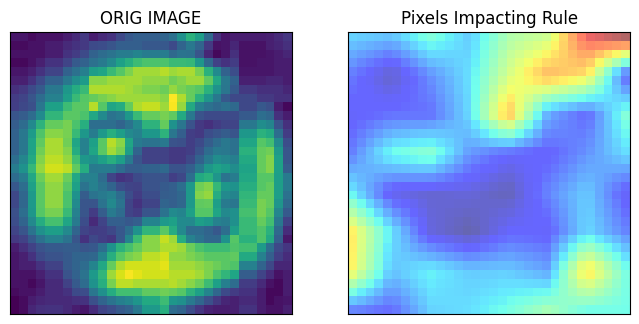

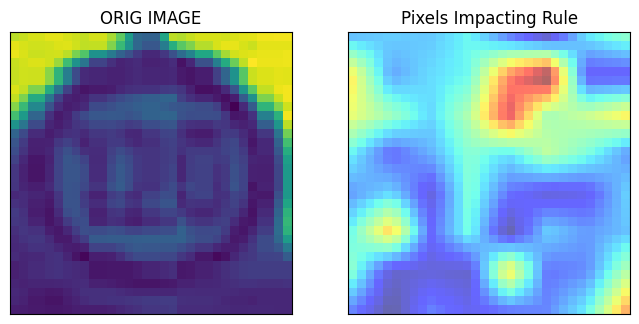

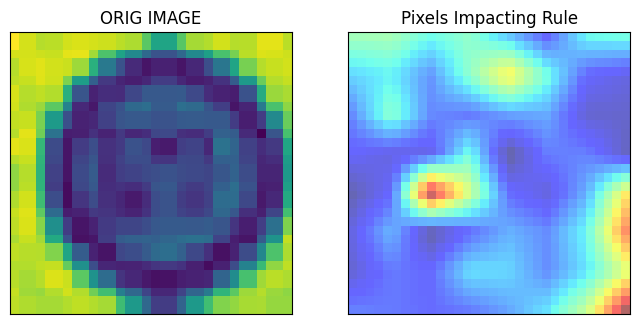

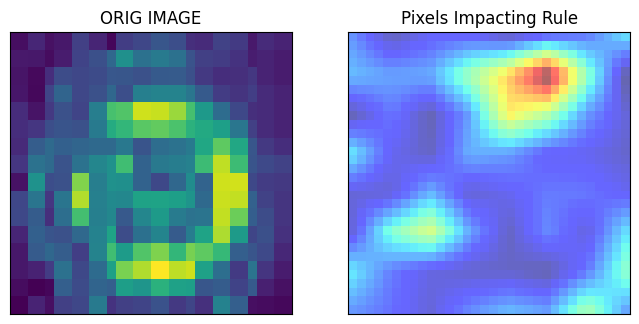

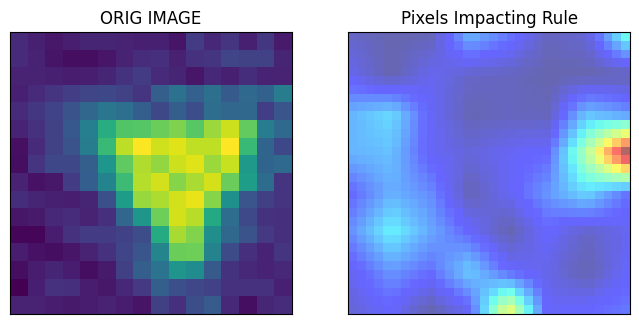

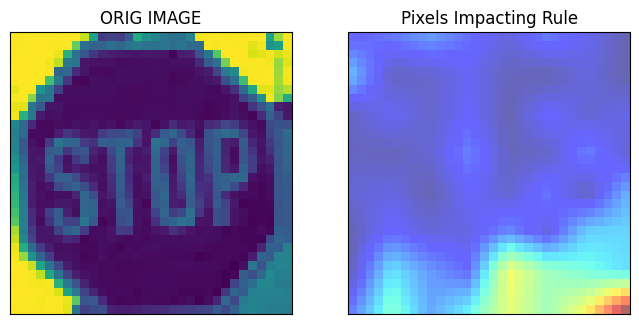

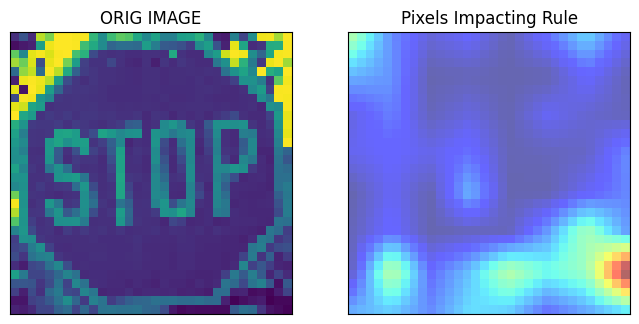

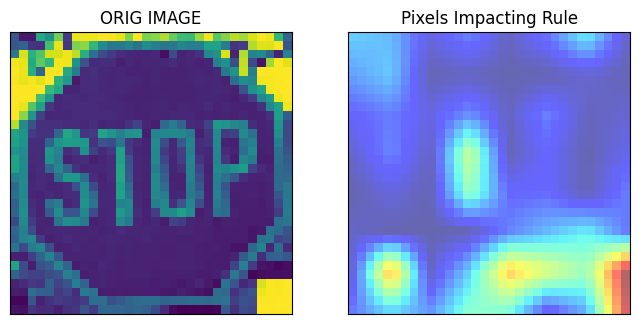

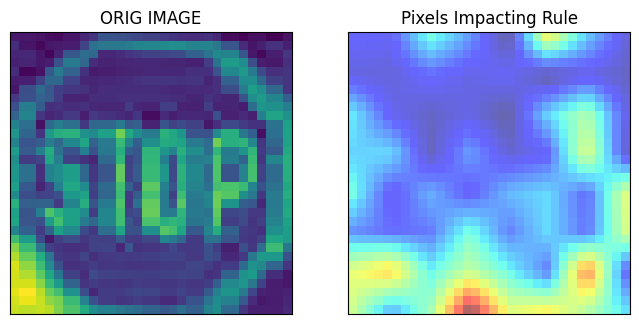

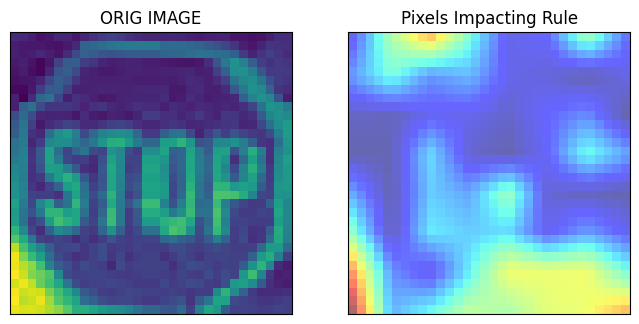

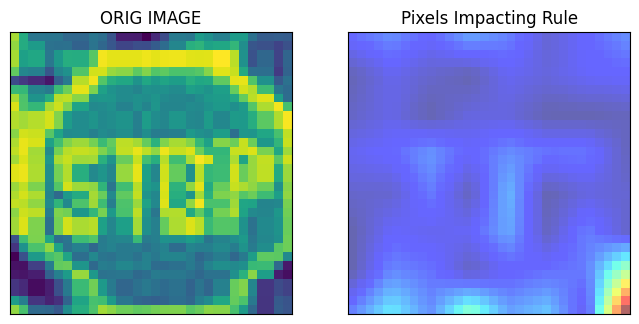

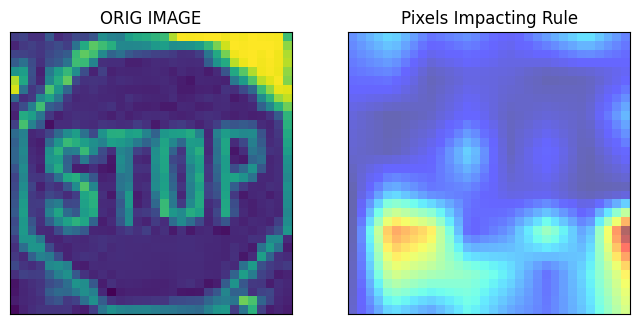

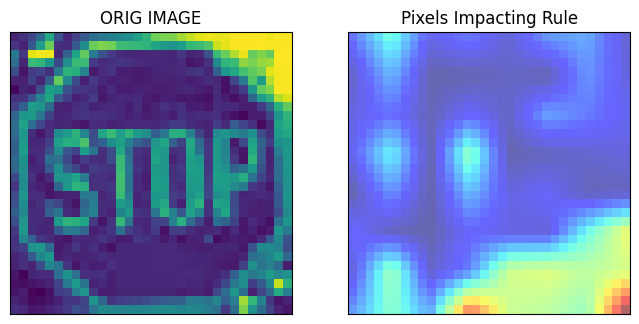

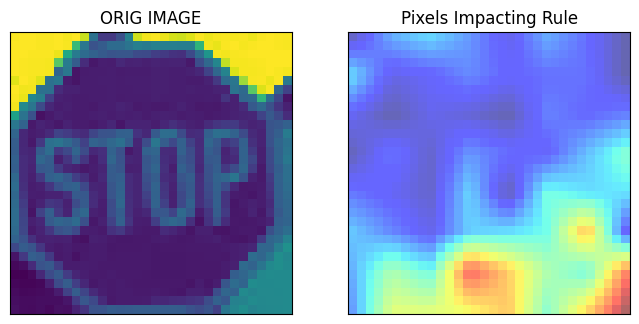

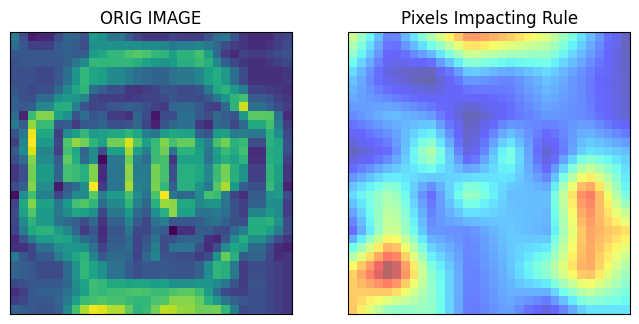

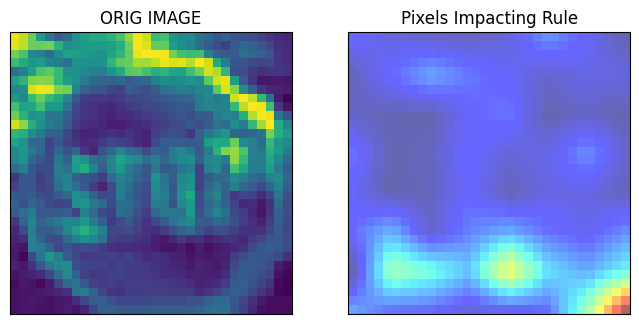

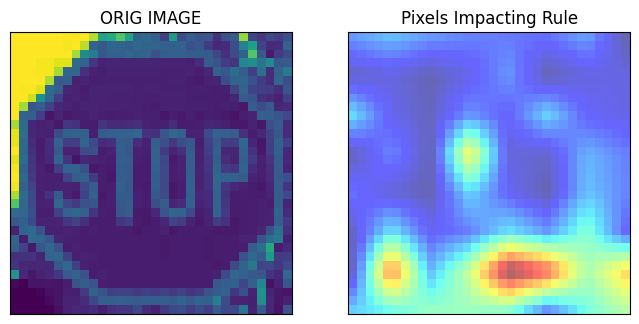

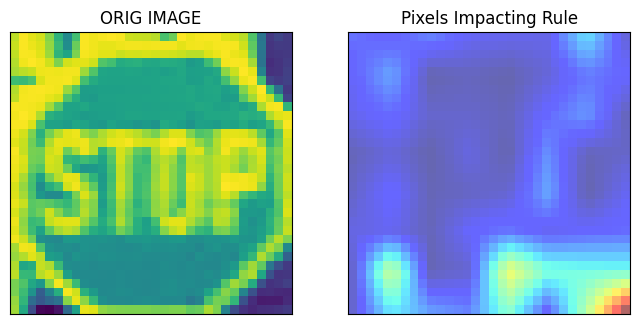

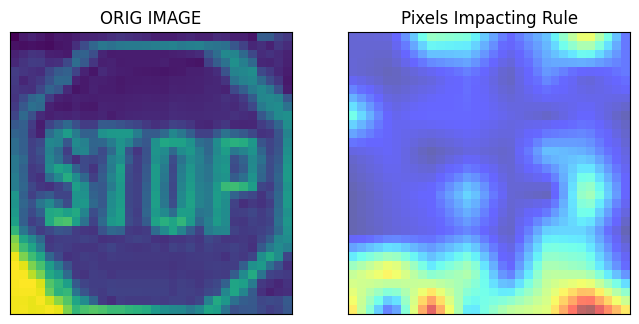

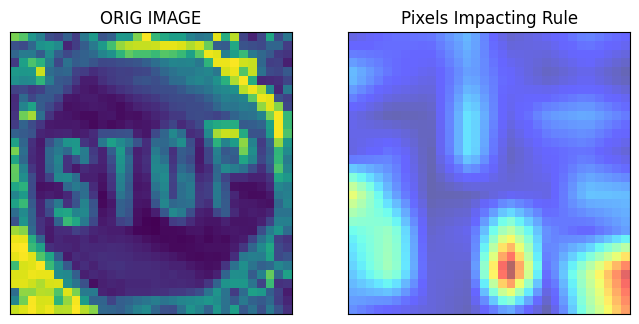

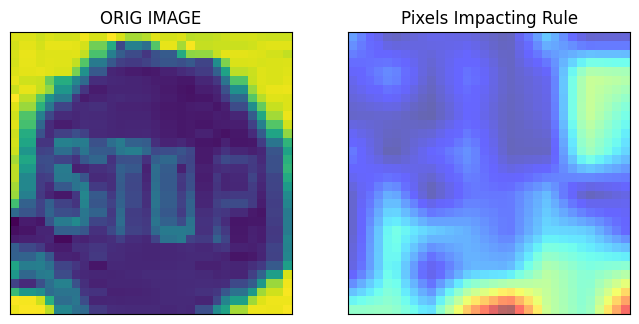

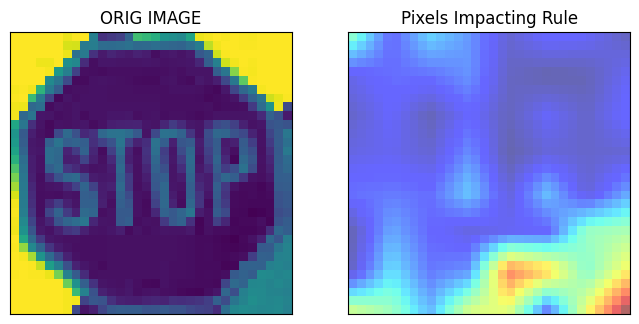

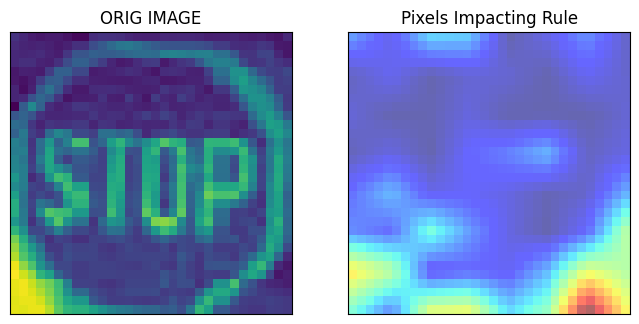

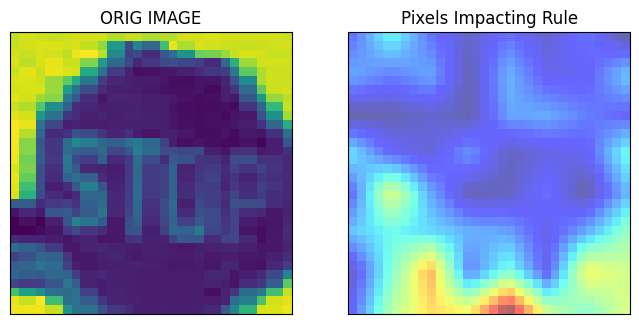

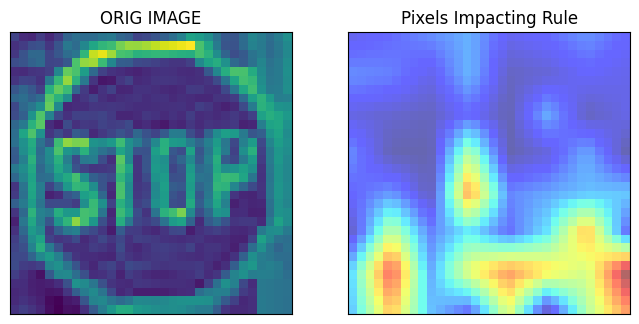

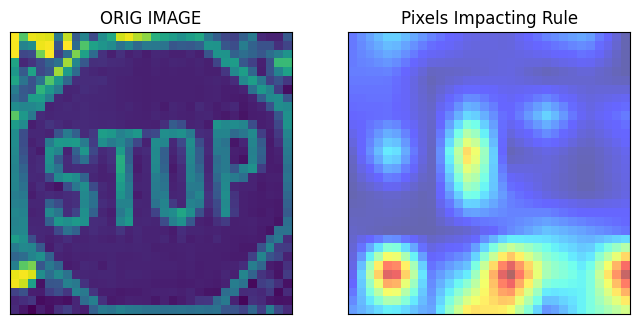

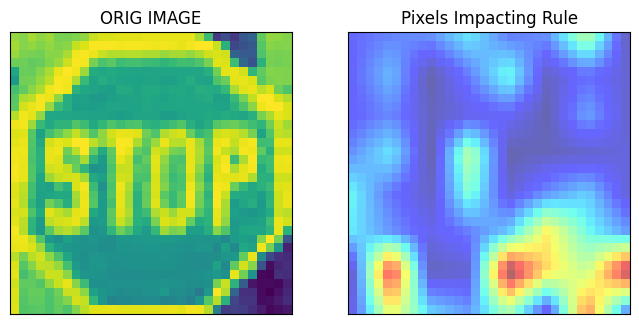

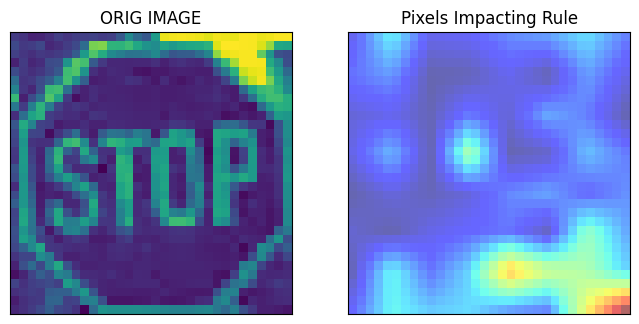

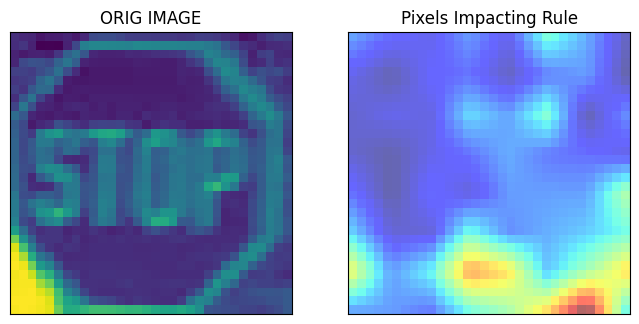

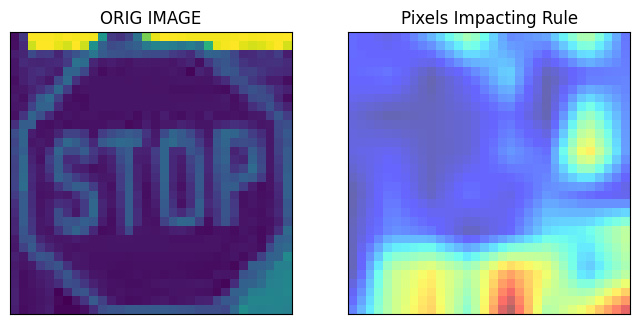

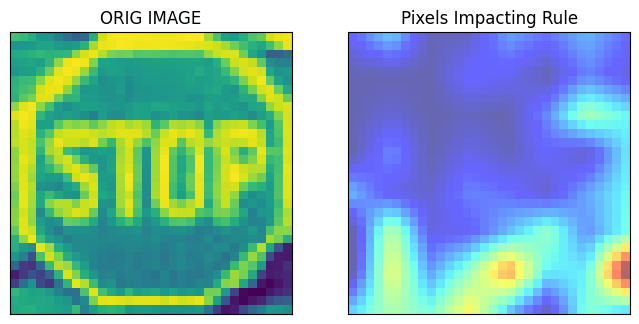

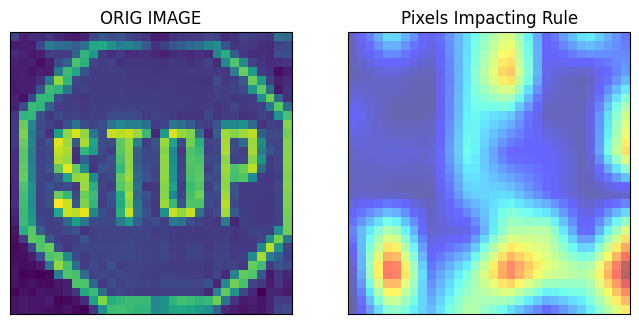

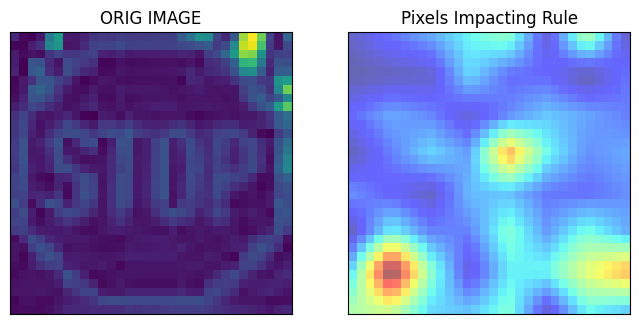

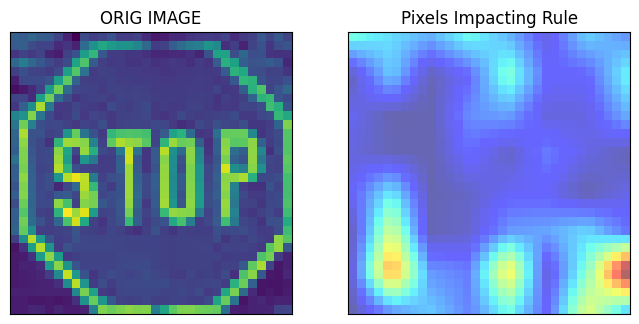

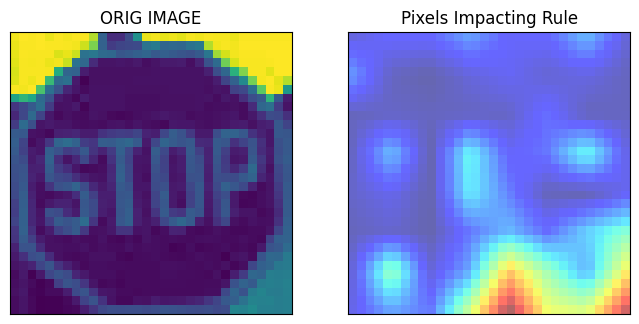

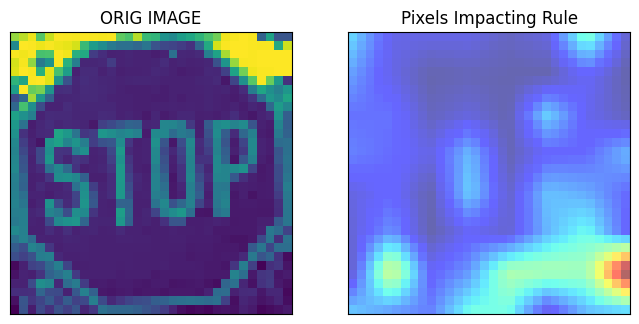

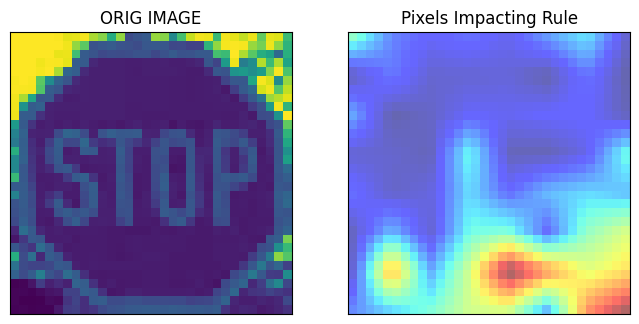

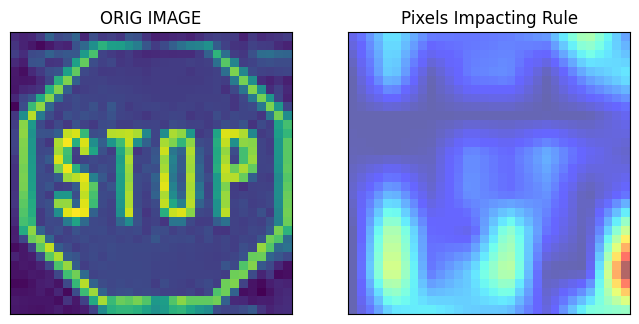

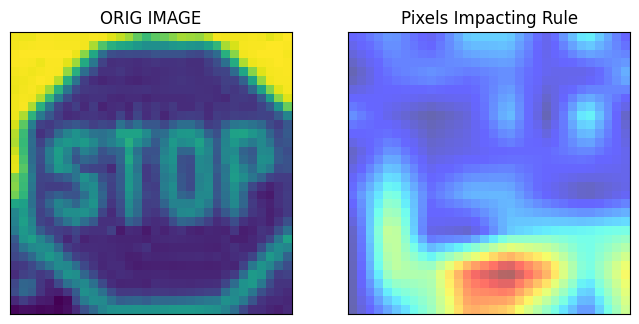

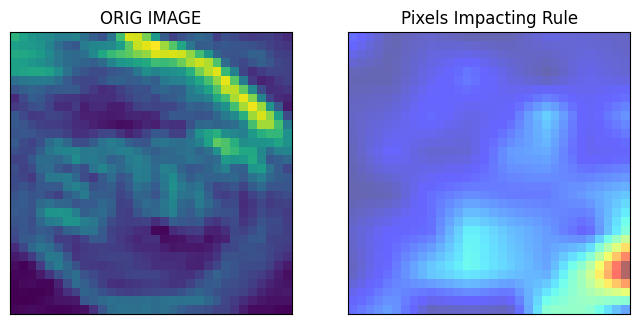

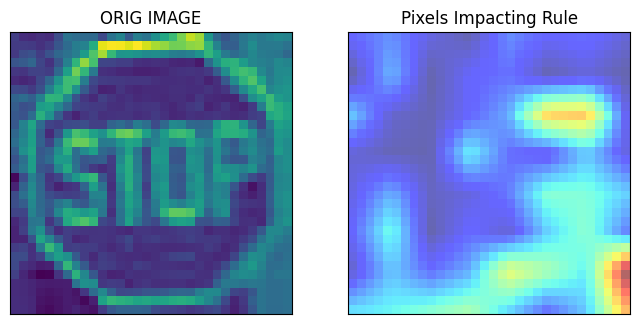

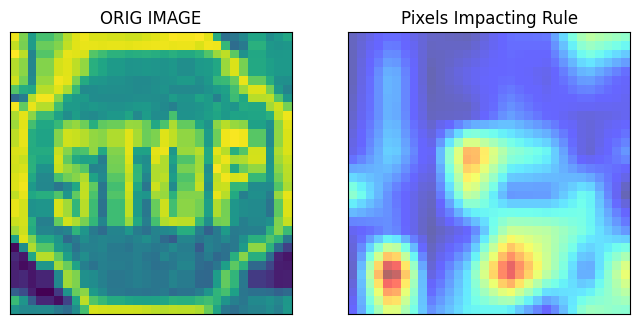

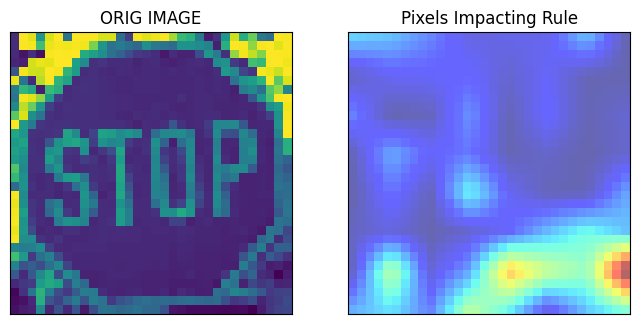

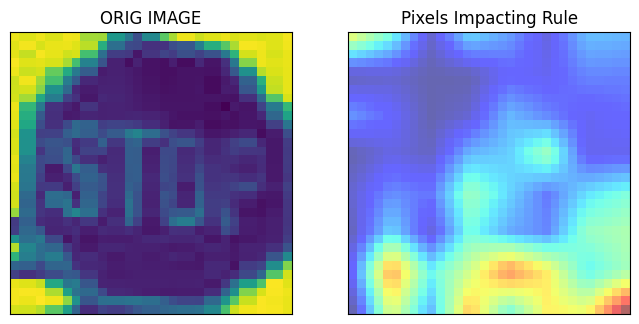

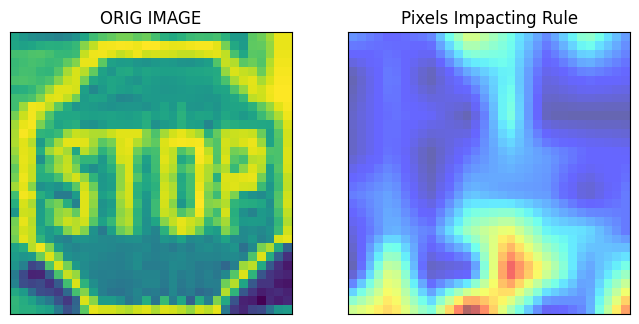

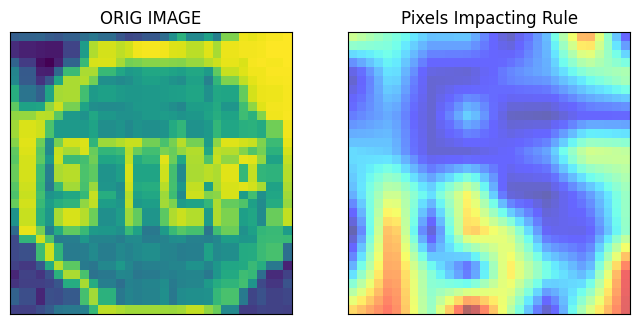

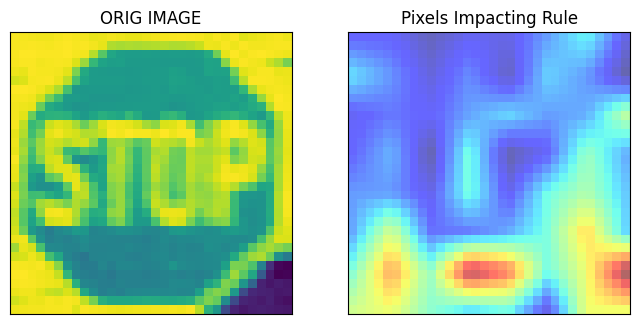

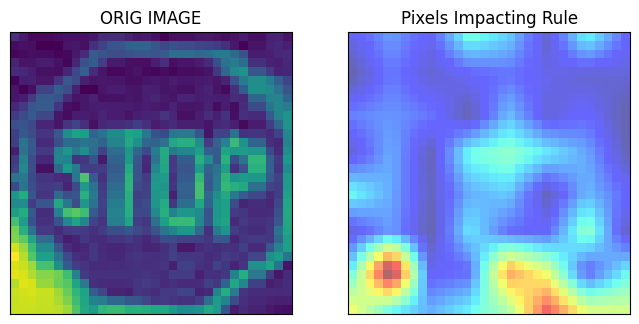

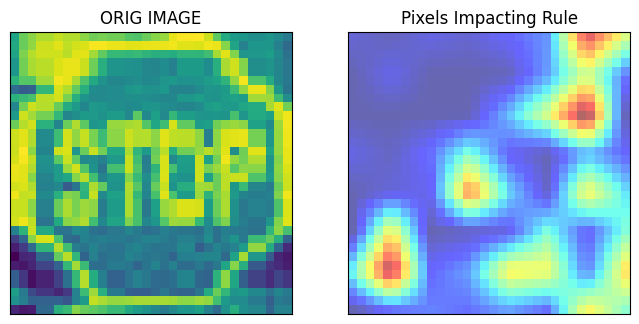

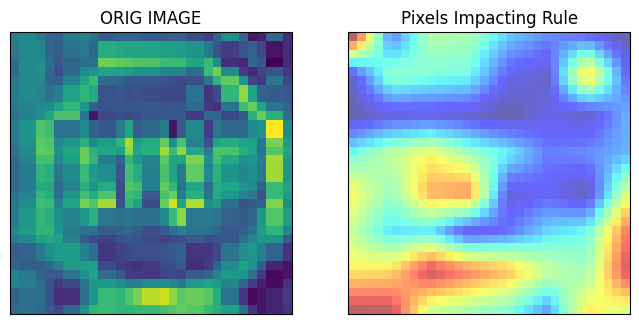

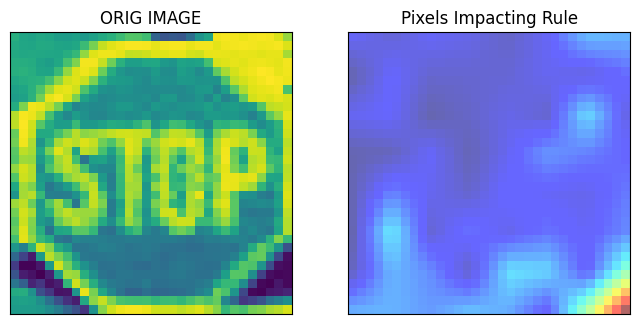

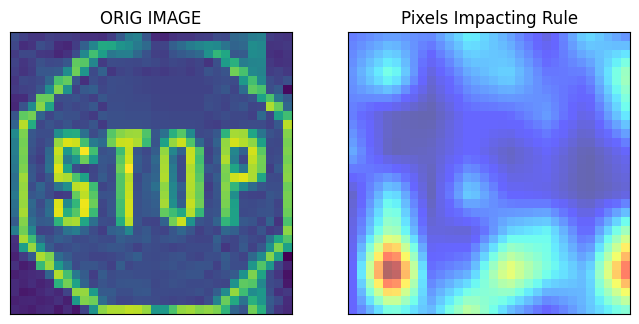

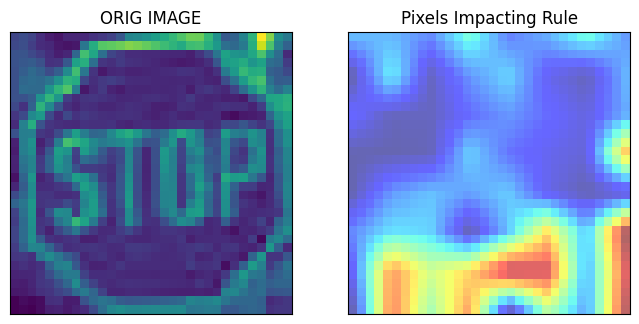

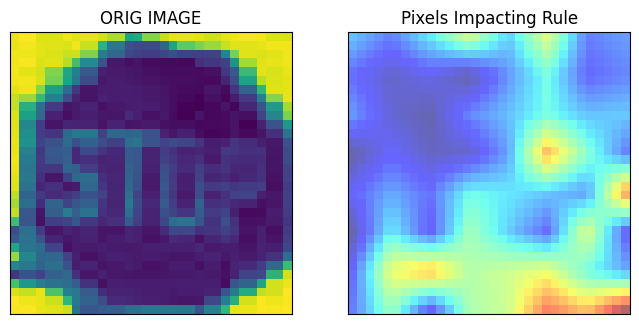

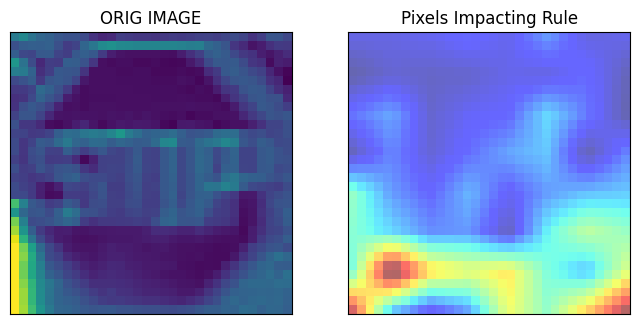

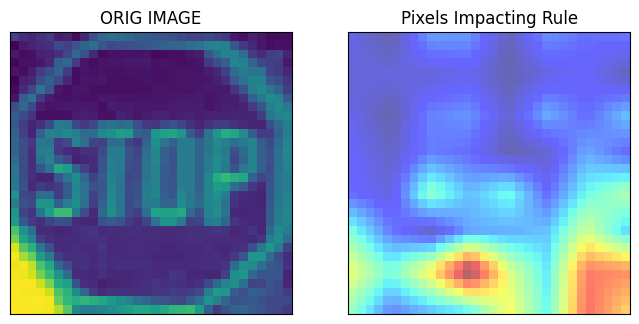

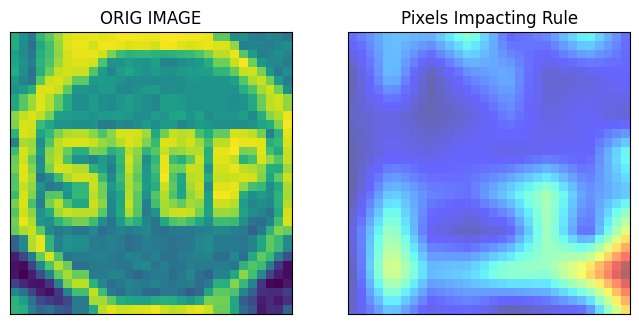

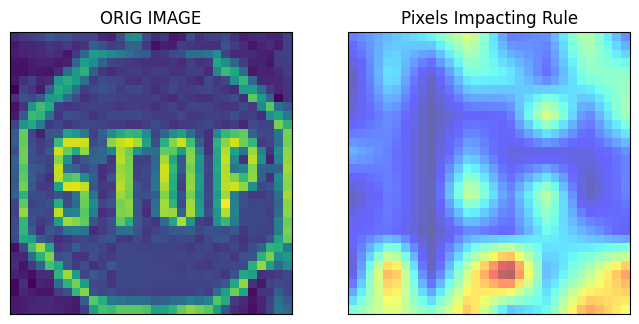

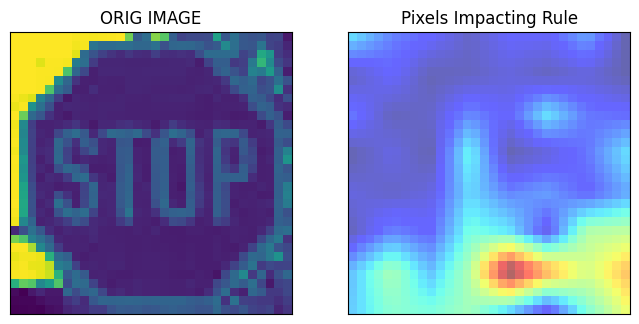

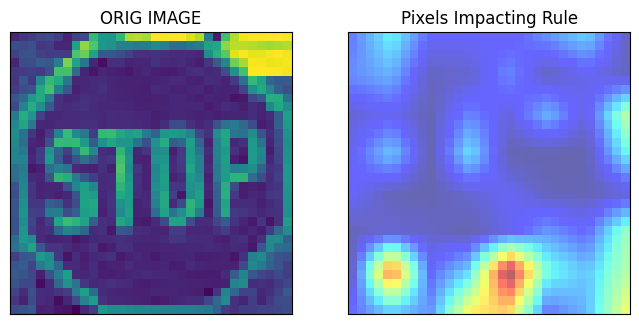

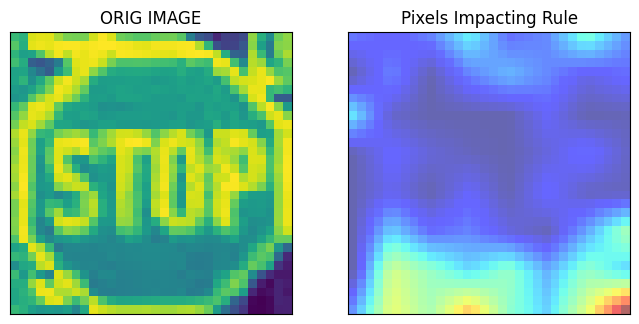

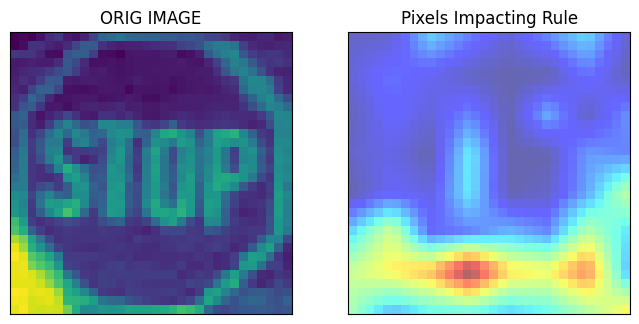

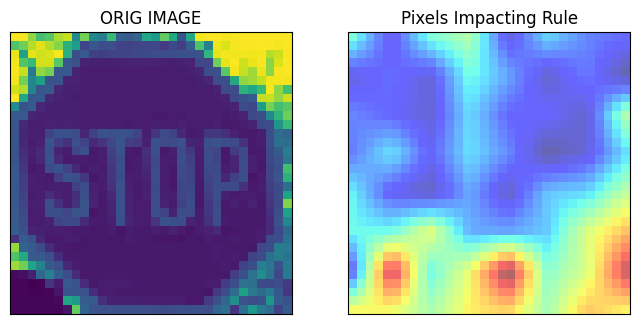

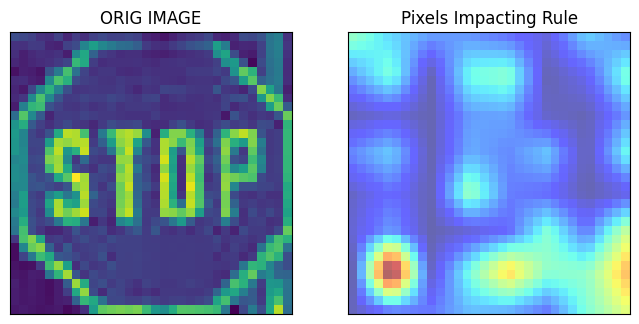

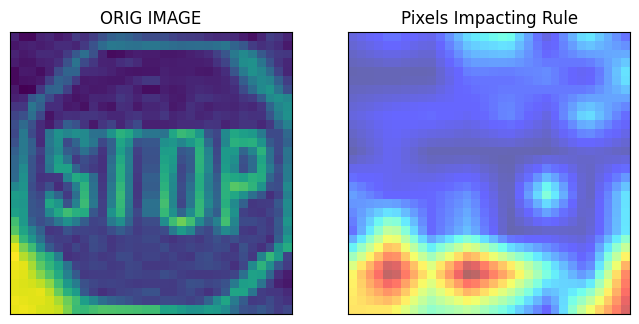

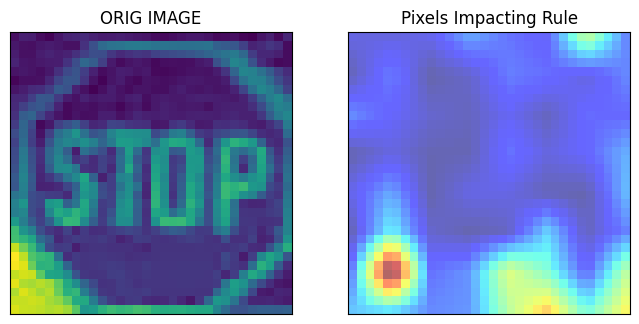

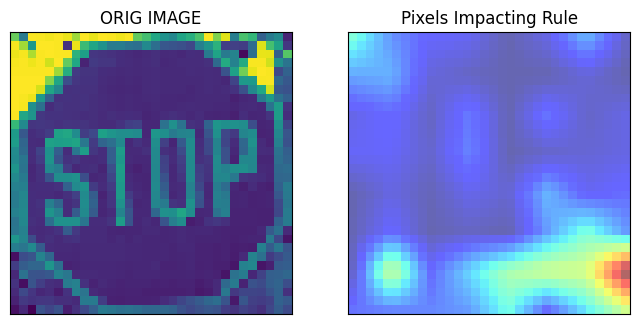

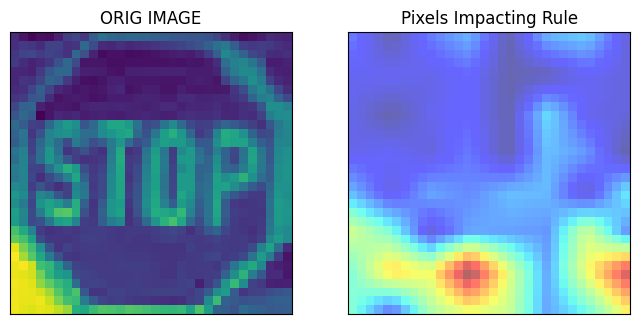

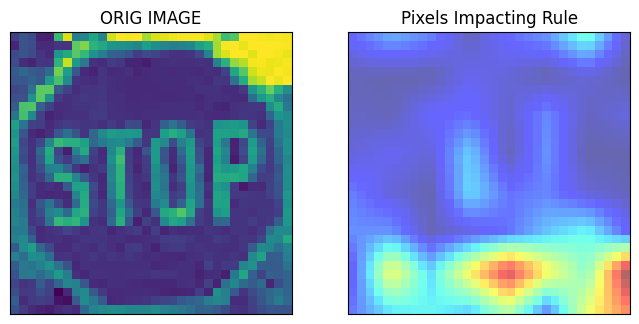

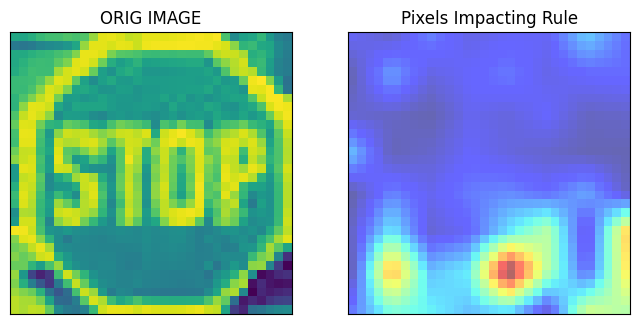

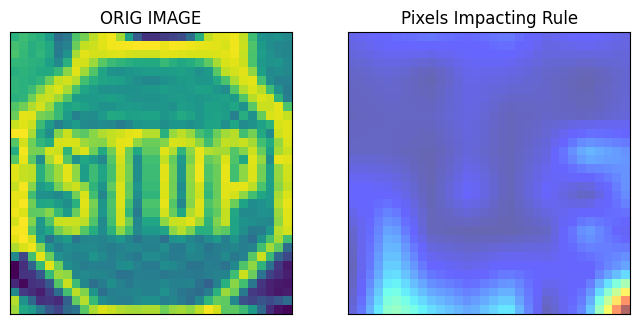

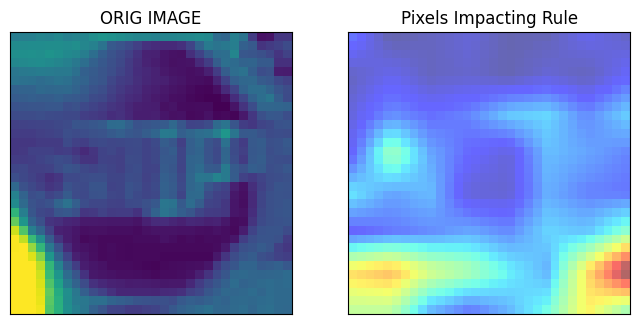

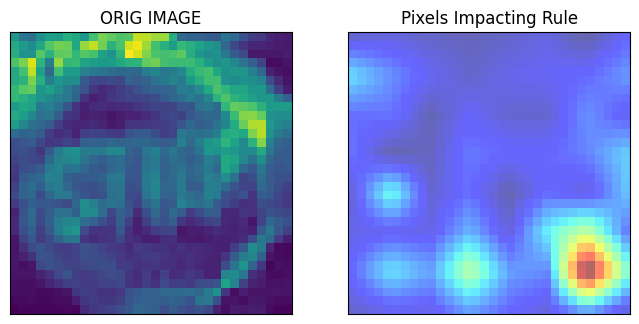

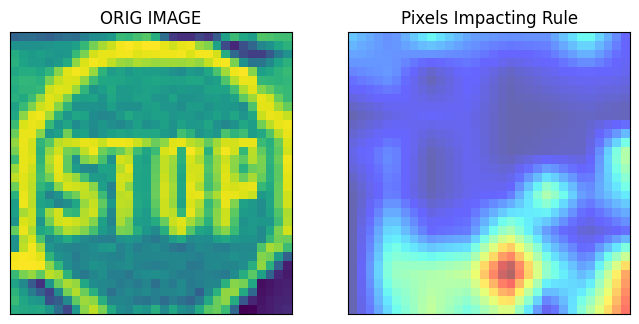

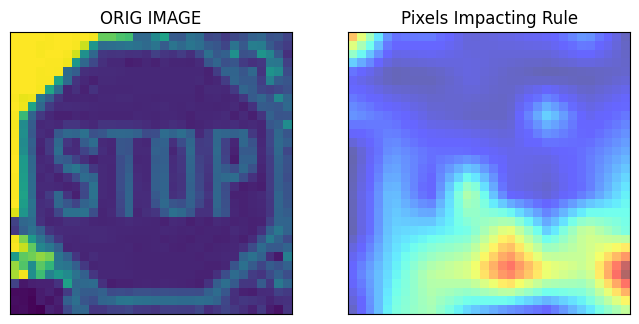

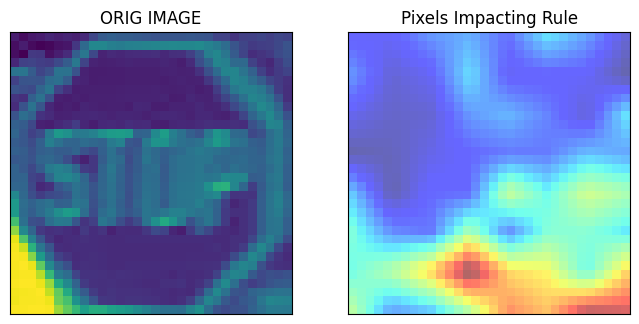

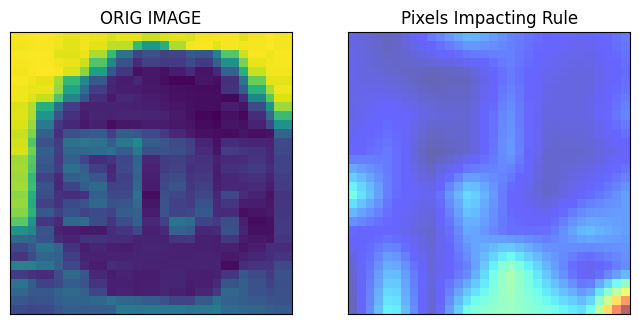

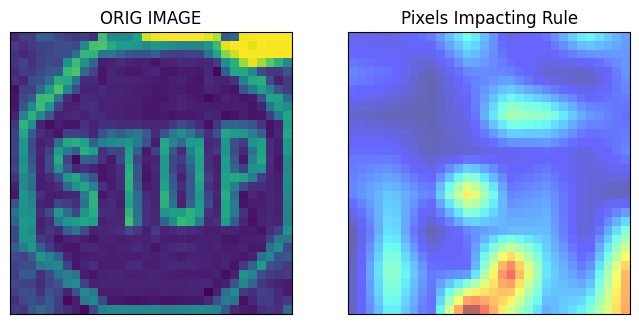

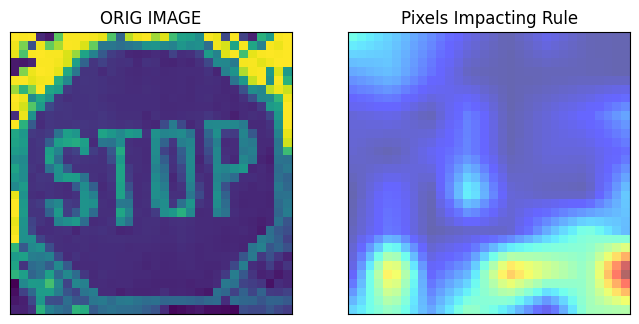

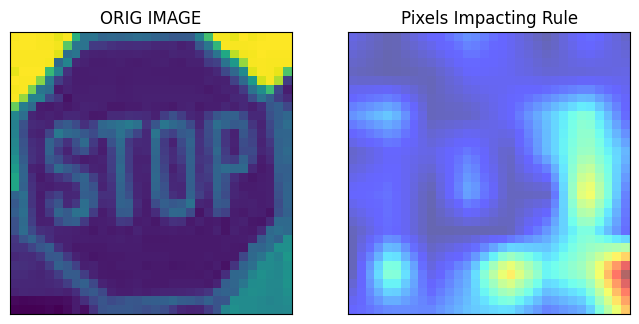

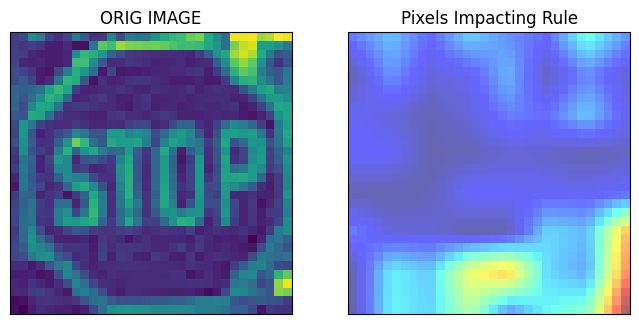

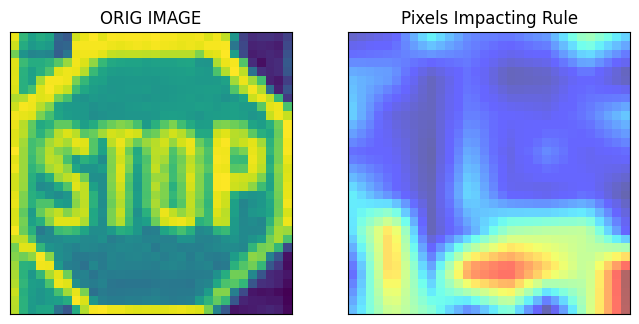

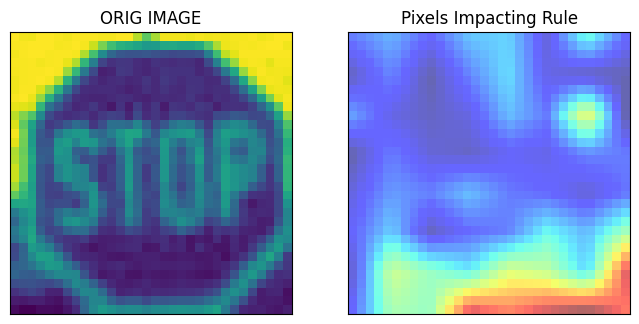

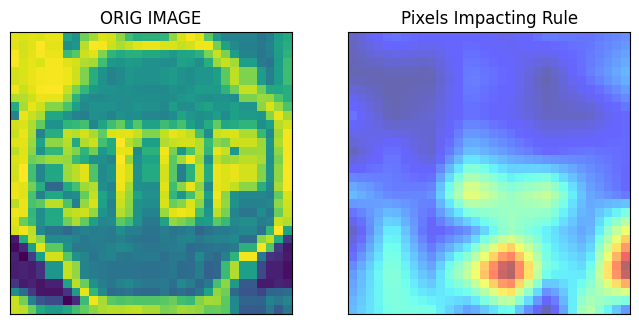

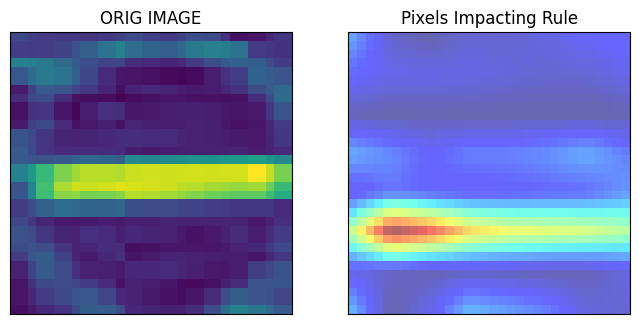

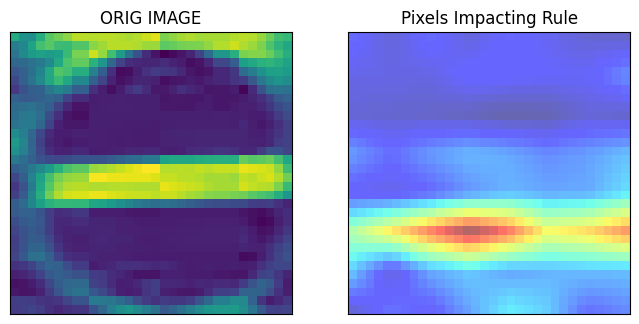

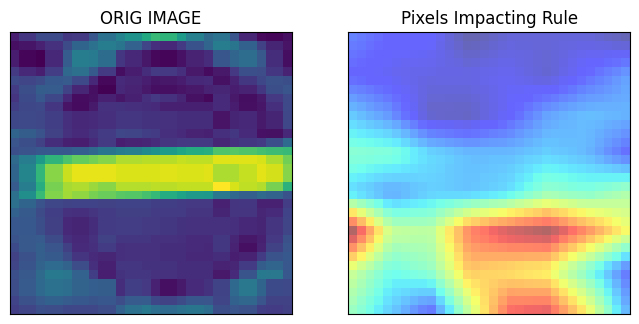

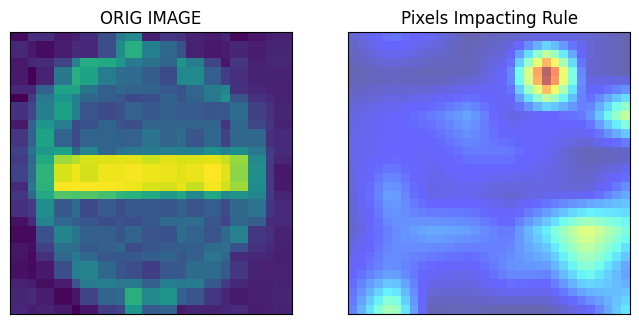

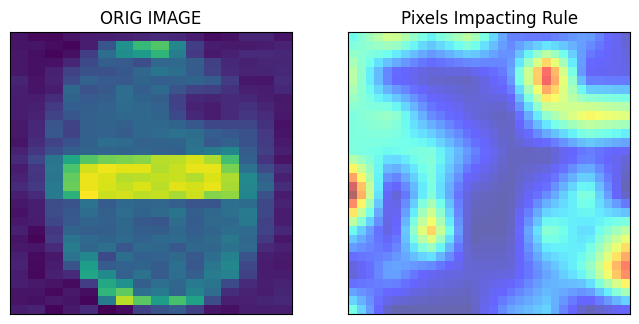

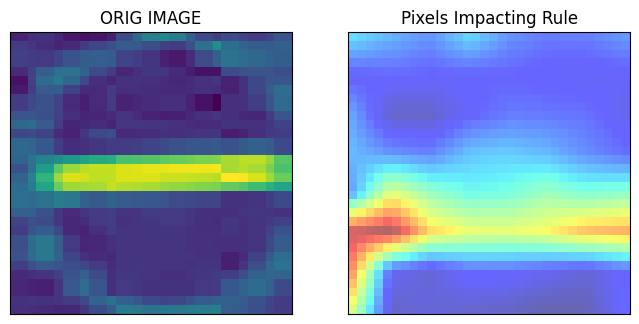

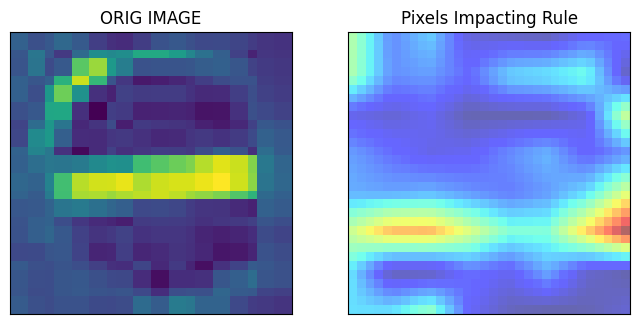

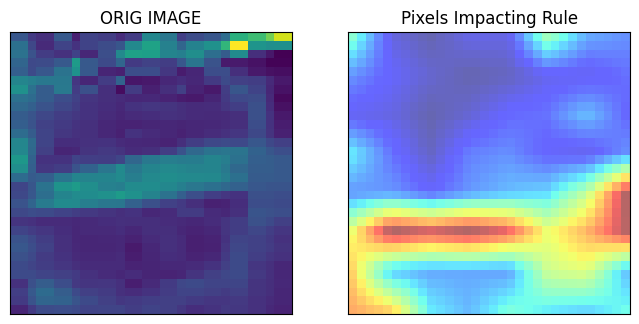

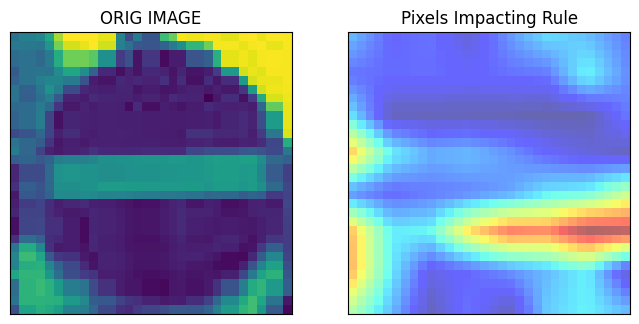

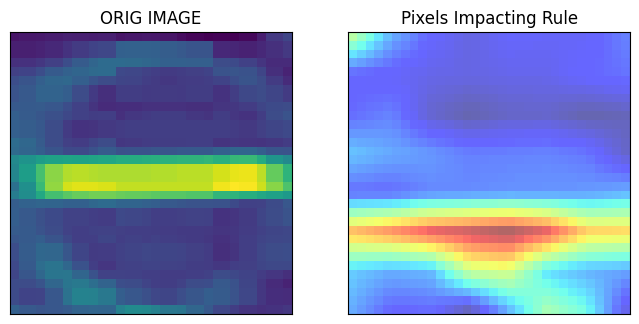

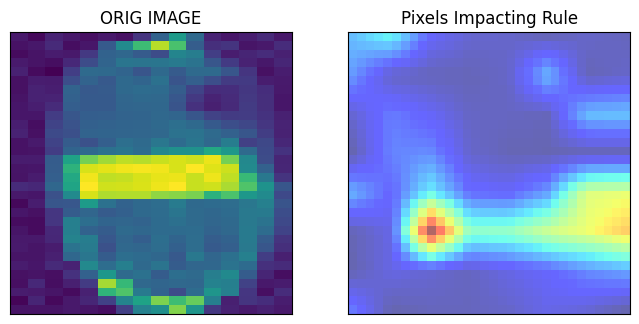

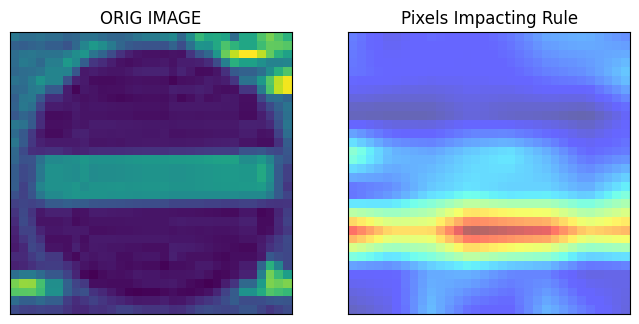

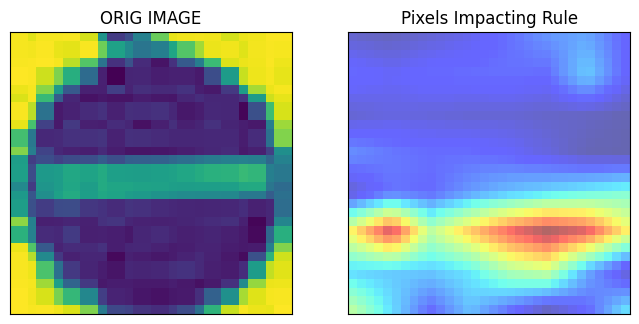

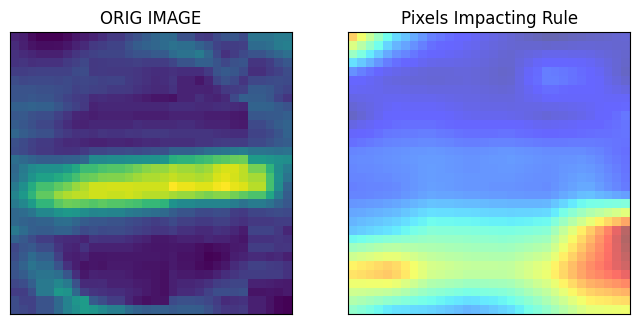

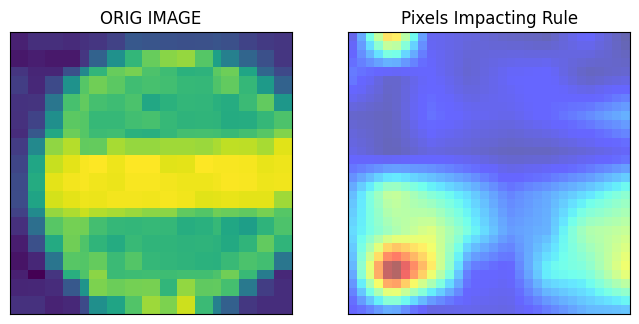

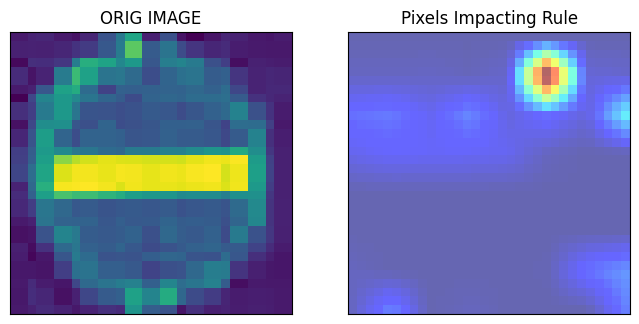

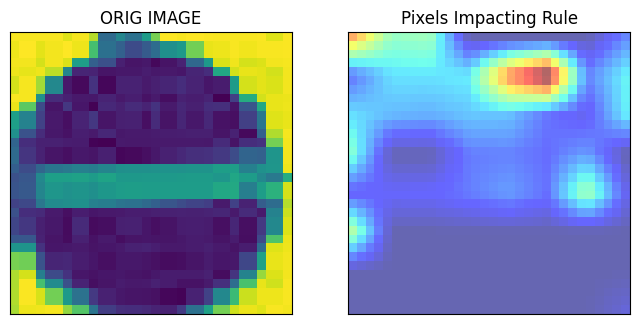

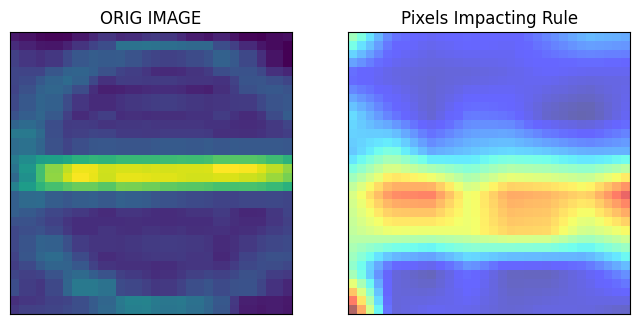

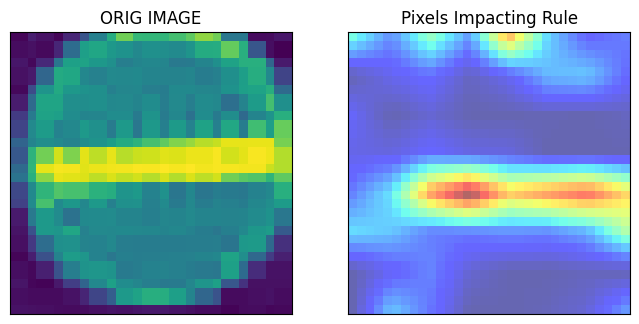

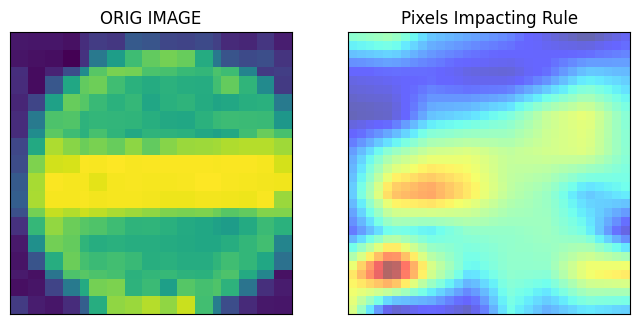

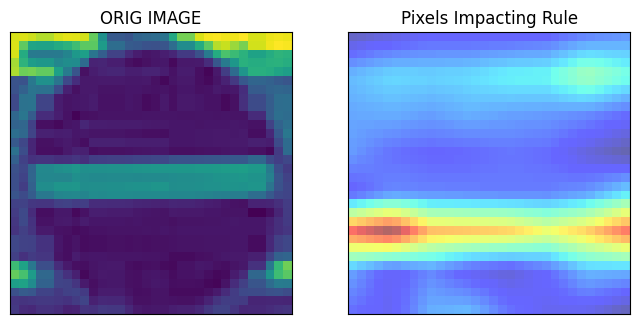

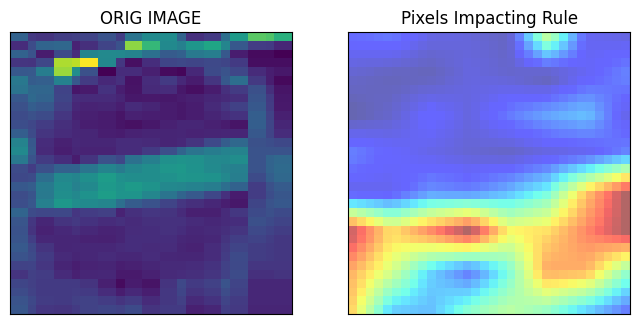

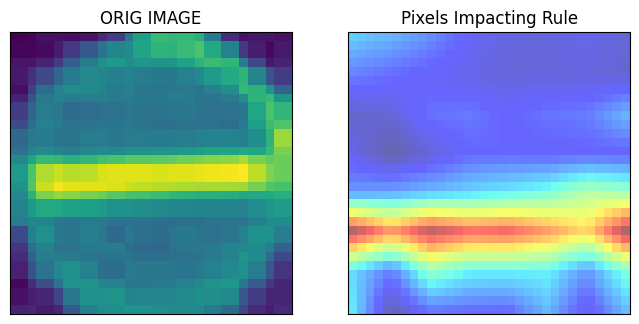

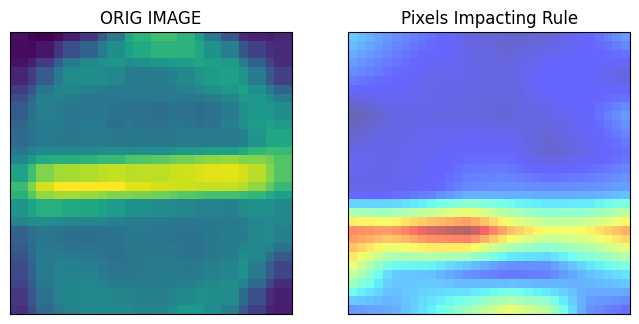

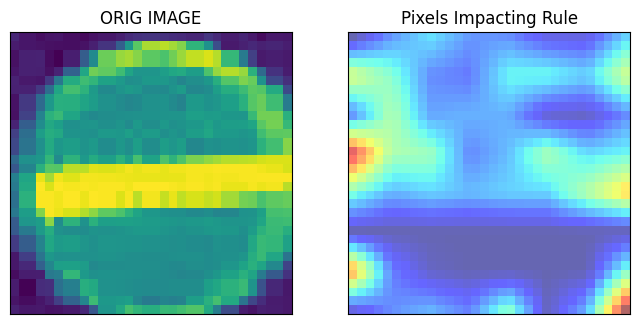

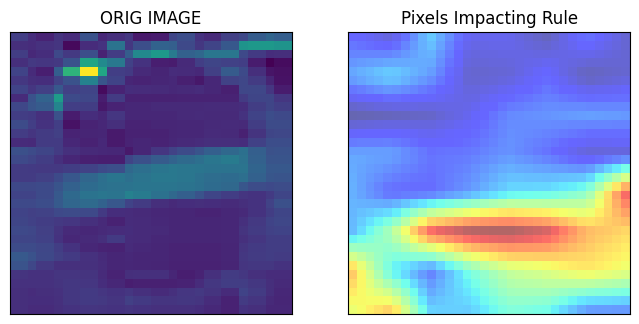

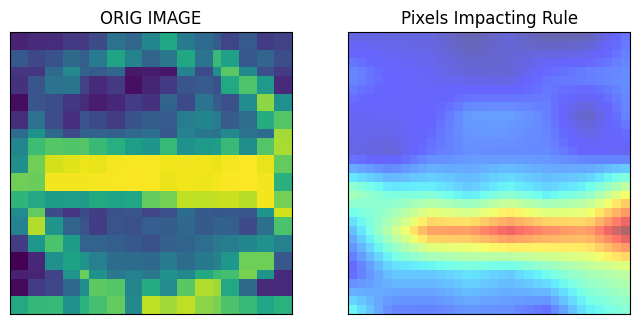

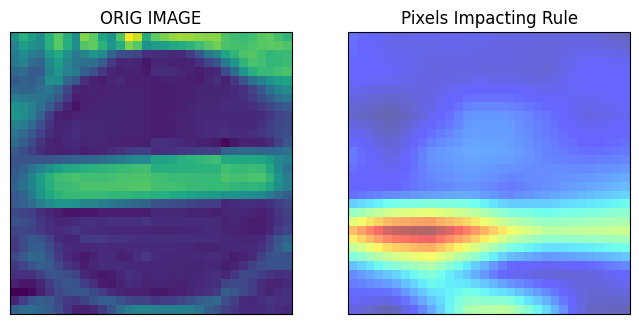

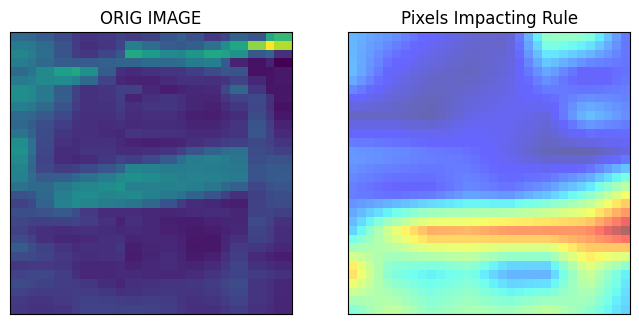

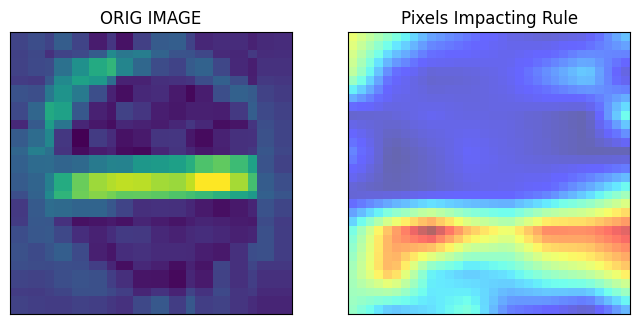

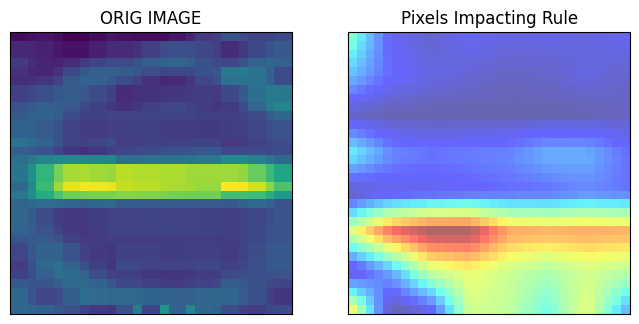

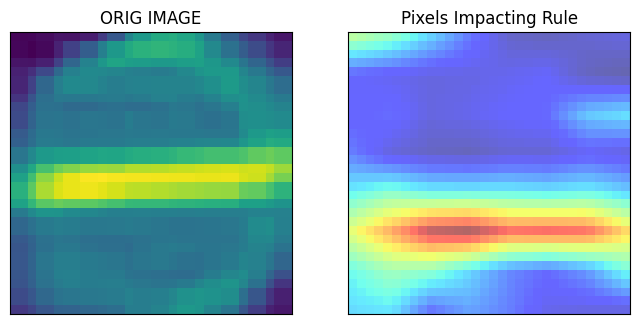

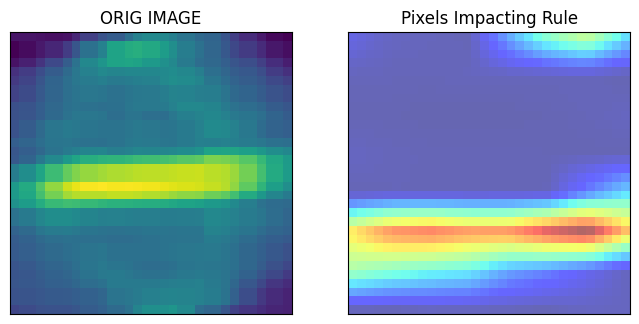

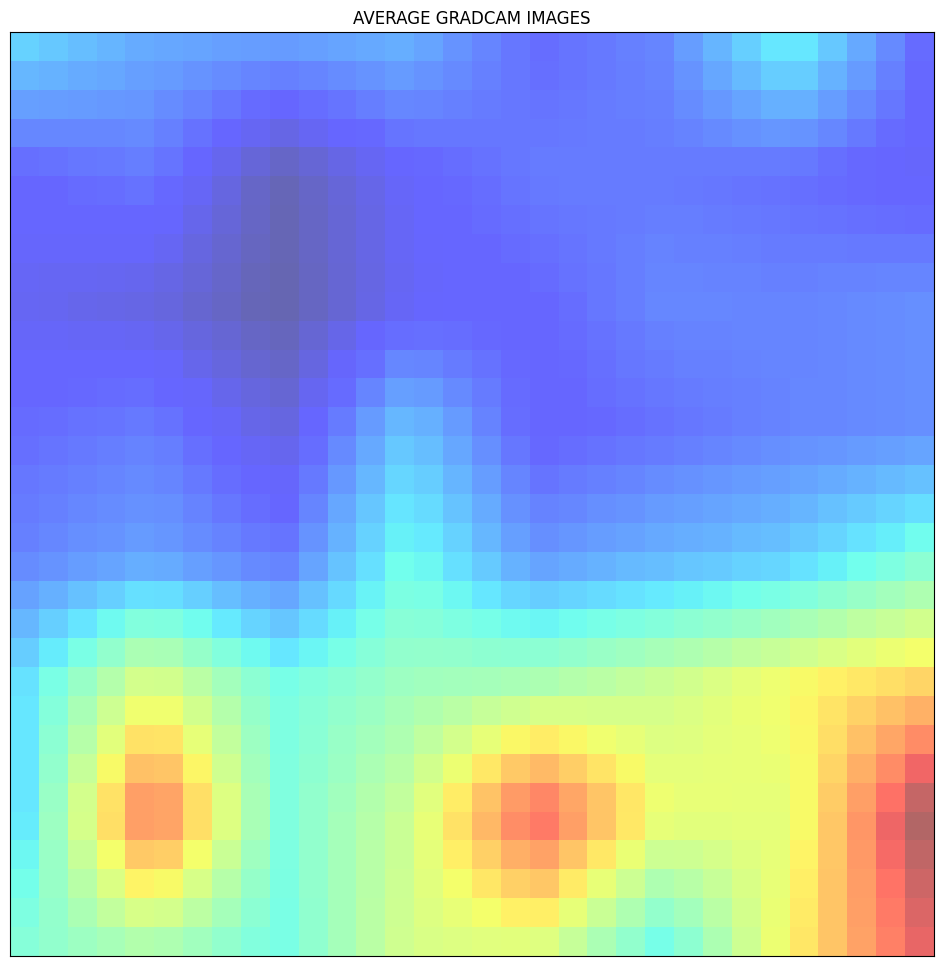

In [74]:
print("Visualize Top Rule of Label 38 at dense_1:")
print("Highlight Pixels that impact the rule:")

fngprnt = (fingerprints1[0] > 0.0).astype('int')
visualize(rule_neurons_list,rule_sig_list,fngprnt, "dense_1",SUMMARY=True)
